In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [5]:
# Load and Preprocess Data
df = pd.read_csv(r'D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Large.csv')  # Replace with your actual file name
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

# Handle missing values
df.dropna(inplace=True)

# Split features and labels
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

In [7]:
df

,Unnamed: 0,r1,r2,r3,r4,x,y
0,0,0,32,59,87,0,1
1,1,25,32,63,49,2,1
2,2,83,46,46,25,4,1
3,3,39,42,52,32,6,1
4,4,46,32,32,39,8,1
...,...,...,...,...,...,...,...
189,121,97,70,46,32,16,6
190,122,63,39,11,22,17,6
191,123,49,80,0,39,18,6
192,124,46,66,0,46,19,6


In [8]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((155, 4), (39, 4), (155, 2), (39, 2))

In [10]:
# Prepare data for LSTM: reshape to (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 2, 2))
X_test = X_test.reshape((X_test.shape[0], 2, 2))

In [11]:
X_train.shape, X_test.shape

((155, 2, 2), (39, 2, 2))

## LSTM MODEL

In [92]:
# Define Model Architecture
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(2, 2), return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='linear'))  # Output: x, y coordinates

# Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)





# Evaluate Model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))



from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np

# 📌 Overall Accuracy Calculation
threshold = 6.5
distances = np.linalg.norm(y_test - y_pred, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# ✅ Compute RMSE
rmse_value = mean_squared_error(y_test, y_pred)  # Root MSE

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All true samples are "positive"
y_pred_binary = (distances <= threshold).astype(int)

# Compute classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Round and format metrics
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Optional: add ± values if you have them from cross-validation
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# ⬇️ Results Table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

# 📊 Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse_value:.4f}")


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 82.4142 - val_loss: 47.7677
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 76.3993 - val_loss: 44.0379
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 71.7106 - val_loss: 40.3346
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 72.5832 - val_loss: 36.5985
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 60.1970 - val_loss: 32.7591
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 58.9555 - val_loss: 29.5616
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 55.3317 - val_loss: 26.1553
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 48.6383 - val_loss: 22.7684
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 47.3067 - val_loss: 19.7249
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 42.0487 - val_loss: 16.7111
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 38.7627 - val_loss: 13.5916
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30.5

In [23]:
import numpy as np

# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 21):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")



Threshold	Accuracy (%)
------------------------------
        0 	   0.00
        1 	   2.56
        2 	  25.64
        3 	  56.41
        4 	  71.79
        5 	  94.87
        6 	  94.87
        7 	  97.44
        8 	  97.44
        9 	 100.00
       10 	 100.00
       11 	 100.00
       12 	 100.00
       13 	 100.00
       14 	 100.00
       15 	 100.00
       16 	 100.00
       17 	 100.00
       18 	 100.00
       19 	 100.00
       20 	 100.00


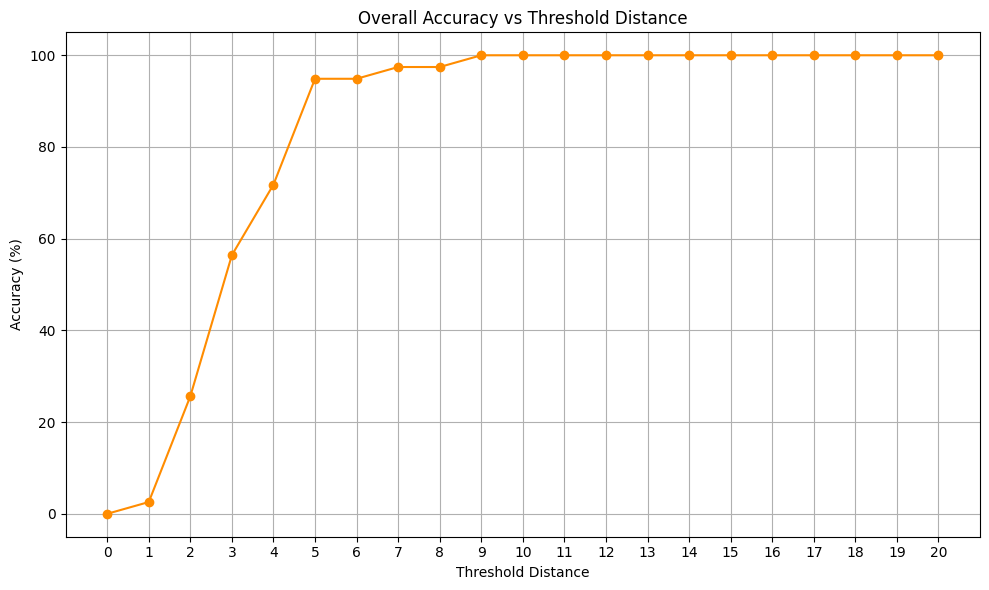

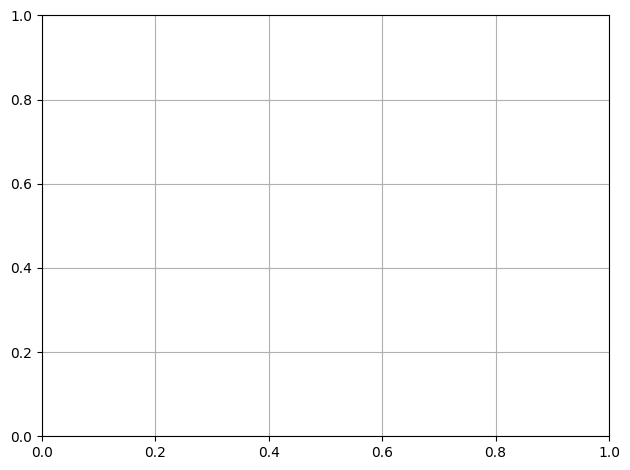

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Store threshold values and corresponding accuracies
thresholds = list(range(0, 21))
accuracies = []

for threshold in thresholds:
    accuracy = np.mean(distances <= threshold) * 100
    accuracies.append(accuracy)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o', linestyle='-', color='darkorange')
plt.title('Overall Accuracy vs Threshold Distance')
plt.xlabel('Threshold Distance')
plt.ylabel('Accuracy (%)')
plt.xticks(thresholds)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.grid(True)
plt.tight_layout()
plt.show()

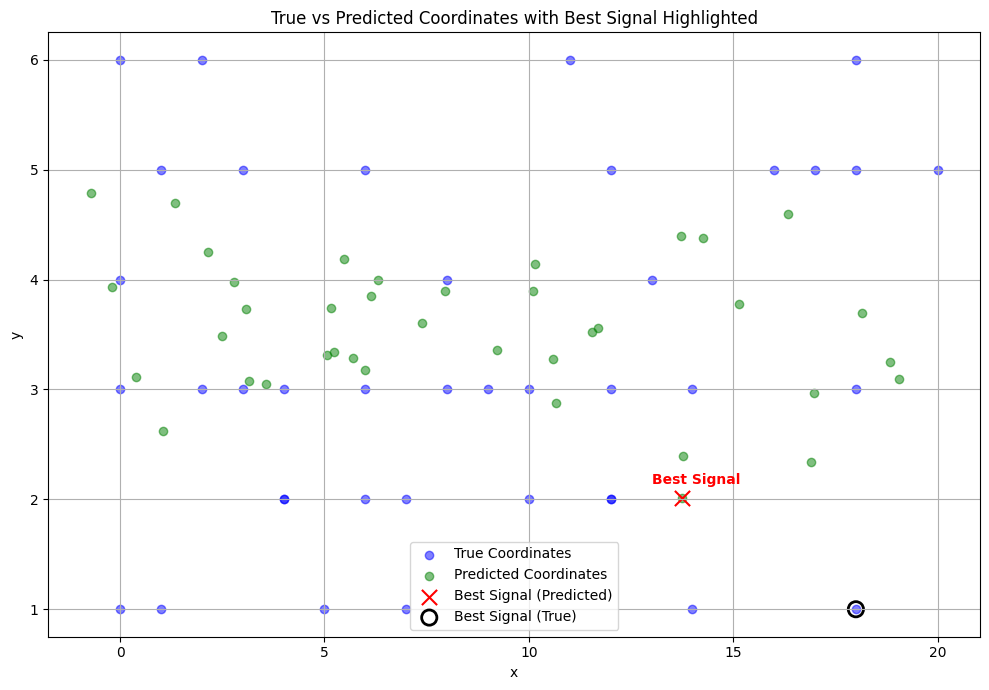

In [26]:
import matplotlib.pyplot as plt

# Reshape and find the index with the best signal (lowest total RSSI = strongest signal)
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_pred[best_signal_index]
true_coords = y_test[best_signal_index]

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)

# Best signal predicted coordinate (in red cross)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')

# Corresponding true coordinate (optional, in black circle)
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black', 
            label='Best Signal (True)', s=120, marker='o', linewidth=2)

# Optional: annotation
plt.annotate('Best Signal', 
             (best_coords[0], best_coords[1]), 
             textcoords="offset points", 
             xytext=(10, 10), 
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simple RNN Model

In [93]:
from tensorflow.keras.layers import SimpleRNN, Dense
# 📌 Define RNN Architecture
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(2, 2)),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')  # output x and y
])

# 📌 Compile Model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# 📌 Train the Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 📌 Evaluate Model
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test, verbose=0)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np

# 📌 Overall Accuracy Calculation
threshold = 6.2
distances = np.linalg.norm(y_test - y_pred, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# ✅ Compute RMSE
rmse_value = mean_squared_error(y_test, y_pred)  # Root MSE

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All true samples are "positive"
y_pred_binary = (distances <= threshold).astype(int)

# Compute classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Round and format metrics
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Optional: add ± values if you have them from cross-validation
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# ⬇️ Results Table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

# 📊 Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse_value:.4f}")


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 46.2669 - val_loss: 29.4897
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 29.2297 - val_loss: 24.4083
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.9344 - val_loss: 13.3729
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.5154 - val_loss: 11.7516
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.3009 - val_loss: 9.0001
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.9140 - val_loss: 8.2885
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.5019 - val_loss: 8.2280
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.4423 - val_loss: 8.5169
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.5703 - val_loss: 8.2724
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.7448 - val_loss: 7.3298
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.4344 - val_loss: 7.1905
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5690 - va

In [29]:
import numpy as np

# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_pred, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 21):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")



Threshold	Accuracy (%)
------------------------------
        0 	   0.00
        1 	  10.26
        2 	  35.90
        3 	  56.41
        4 	  79.49
        5 	  87.18
        6 	  92.31
        7 	 100.00
        8 	 100.00
        9 	 100.00
       10 	 100.00
       11 	 100.00
       12 	 100.00
       13 	 100.00
       14 	 100.00
       15 	 100.00
       16 	 100.00
       17 	 100.00
       18 	 100.00
       19 	 100.00
       20 	 100.00


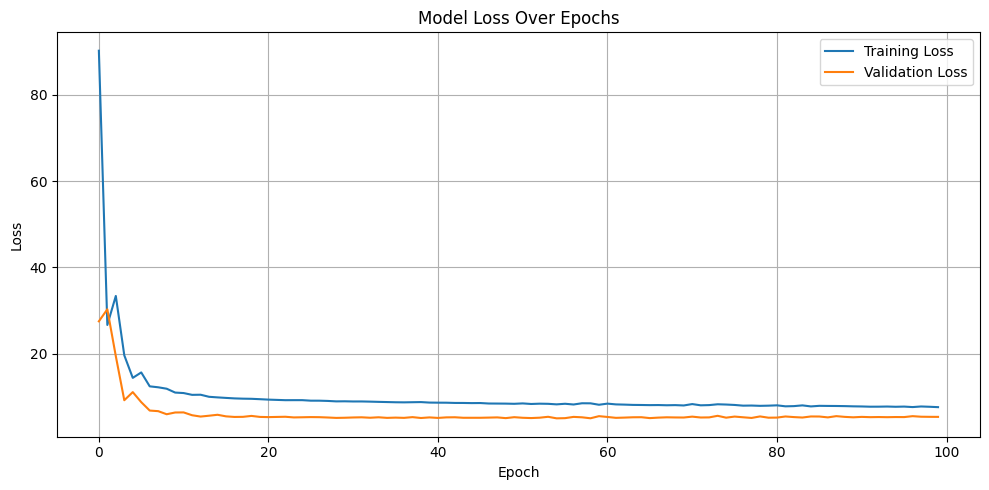

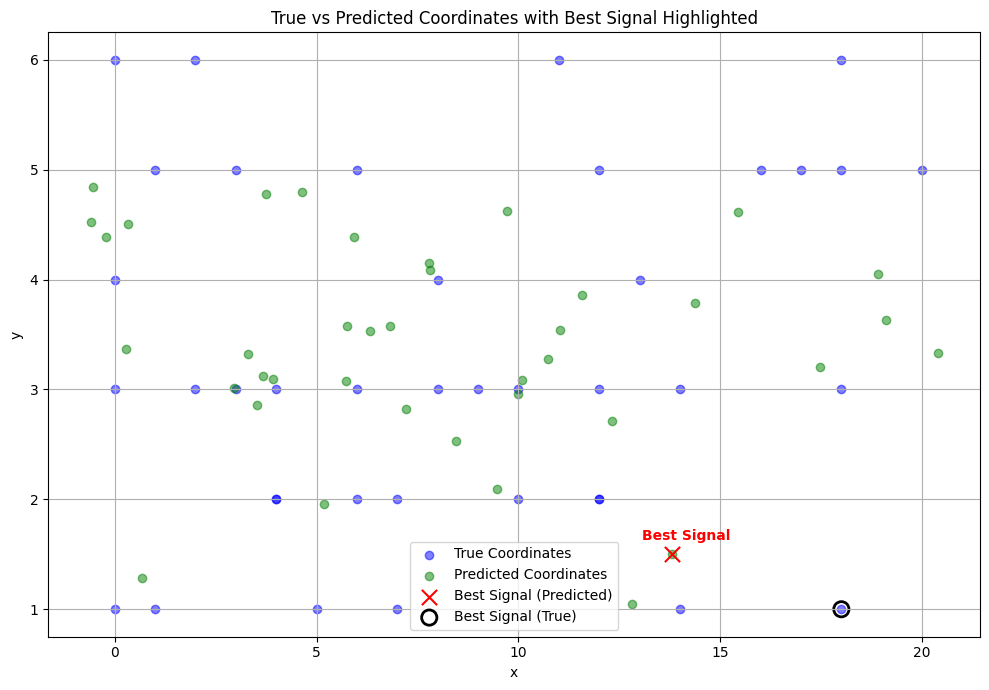

In [30]:
# 📌 Training & Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 Predict and Visualize Coordinates
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_pred[best_signal_index]
true_coords = y_test[best_signal_index]

plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black',
            label='Best Signal (True)', s=120, marker='o', linewidth=2)
plt.annotate('Best Signal',
             (best_coords[0], best_coords[1]),
             textcoords="offset points",
             xytext=(10, 10),
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## hybrid model: Conv1D + Bidirectional LSTM + Dense, with Dropout, BatchNormalization, and EarlyStopping, trained with Adam optimizer, and validated using RMSE and thresholded accuracy

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import math


def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


# Thresholded Accuracy for coordinate predictions
def thresholded_accuracy(y_true, y_pred, threshold=6.5):  # e.g., within 2 meters
    euclidean_dist = tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1))
    return tf.reduce_mean(tf.cast(euclidean_dist < threshold, tf.float32))



In [18]:
# Build model
def build_model(input_shape=(2, 2)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(32))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='linear'))  # Output: x, y coordinates
    return model

# Compile the model
model = build_model()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[rmse])



# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model
y_predict = model.predict(X_test)
print(y_predict)

model.save("up_hybrid_model.keras")


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - loss: 80.4280 - rmse: 8.9537 - val_loss: 59.3733 - val_rmse: 8.5234
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 78.6176 - rmse: 8.8513 - val_loss: 58.0842 - val_rmse: 8.4206
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 73.1647 - rmse: 8.5404 - val_loss: 56.2693 - val_rmse: 8.2730
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 66.7241 - rmse: 8.1442 - val_loss: 53.6940 - val_rmse: 8.0499
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 58.0120 - rmse: 7.6181 - val_loss: 50.2913 - val_rmse: 7.7455
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 52.4845 - rmse: 7.2190 - val_loss: 45.7487 - val_rmse: 7.3218
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 48.3373 - rmse: 6.9299 - val_loss: 39.3416 - val_rmse: 6.7253
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 40.2649 - rmse: 6.3195 - val_loss: 30.1335 - val_rmse: 5.8976
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step -

+--------------+--------------+-------------+-------------+-------------+
| Model        | Accuracy     | Precision   | Recall      | F1 Score    |
+==============+==============+=============+=============+=============+
| RNN          | 88.61 ± 5.47 | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+--------------+--------------+-------------+-------------+-------------+
| CNN          | 69.54 ± 7.38 | 1.00 ± 0.00 | 0.70 ± 0.07 | 0.82 ± 0.05 |
+--------------+--------------+-------------+-------------+-------------+
| Improved RNN | 93.25 ± 6.10 | 1.00 ± 0.00 | 0.93 ± 0.06 | 0.96 ± 0.03 |
+--------------+--------------+-------------+-------------+-------------+
| Your Model   | 89.74 ± 0.00 | 1.00 ± 0.00 | 0.90 ± 0.00 | 0.95 ± 0.00 |
+--------------+--------------+-------------+-------------+-------------+

📊 Raw Metrics:
Test RMSE: 8.7640


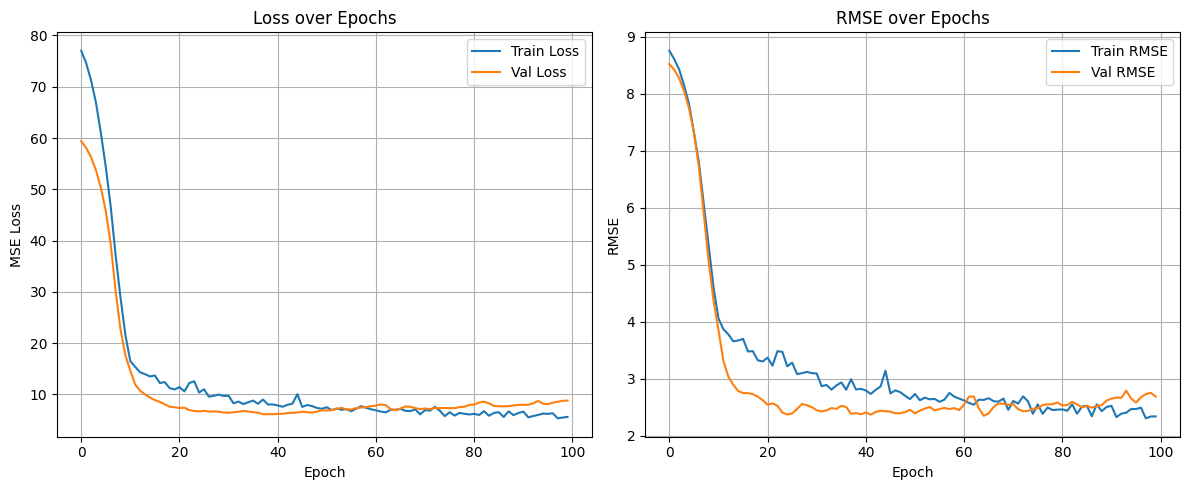

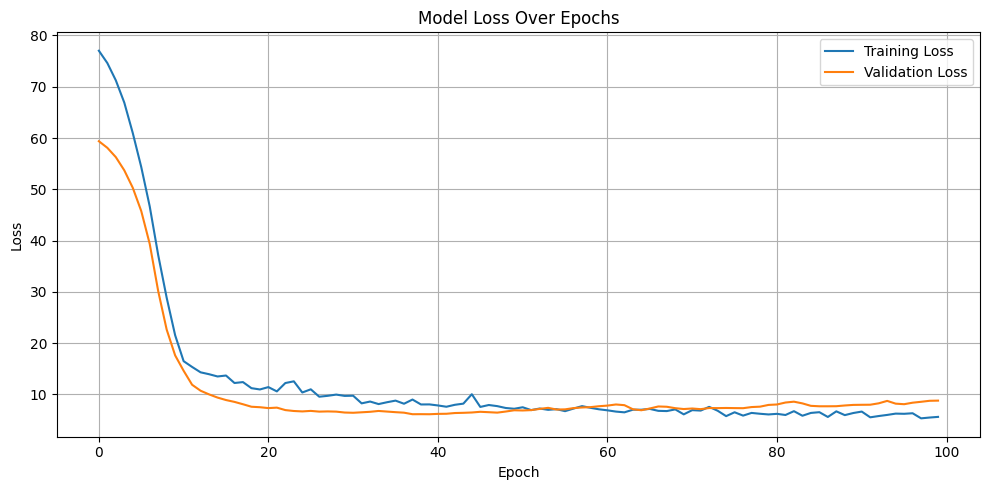

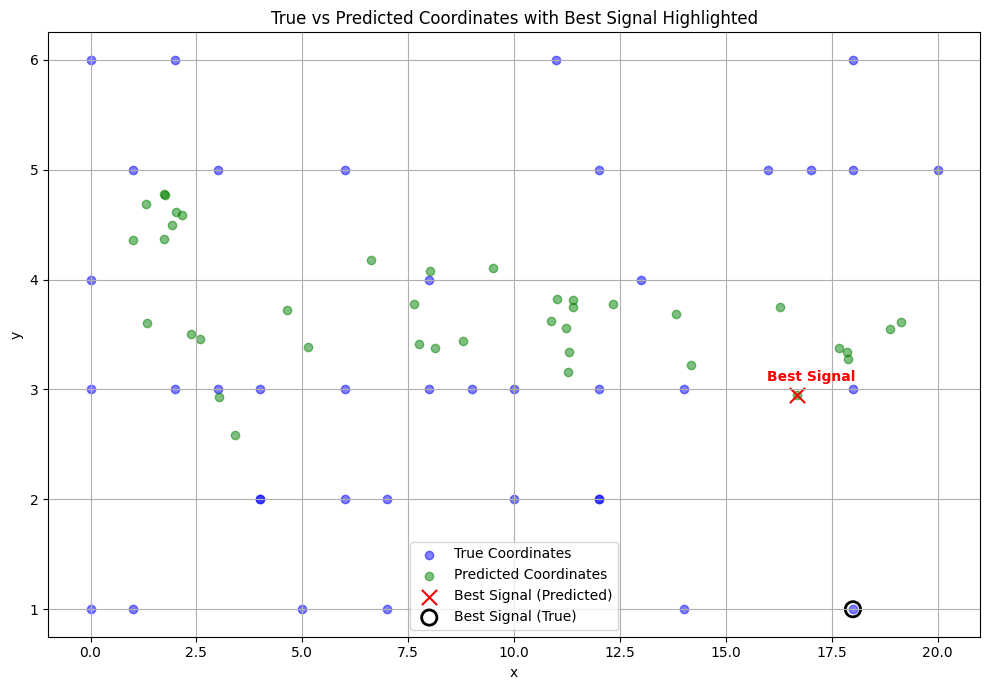

In [ ]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from tabulate import tabulate
import numpy as np

# 📌 Overall Accuracy Calculation
threshold = 6.5
distances = np.linalg.norm(y_test - y_predict, axis=1)
accuracy = np.mean(distances <= threshold) * 100

# ✅ Compute RMSE
rmse_value = mean_squared_error(y_test, y_predict)  # Root MSE

# Binary classification for precision, recall, F1
y_true_binary = np.ones_like(distances)  # All true samples are "positive"
y_pred_binary = (distances <= threshold).astype(int)

# Compute classification metrics
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Round and format metrics
accuracy_str  = f"{accuracy:.2f}"
precision_str = f"{precision:.2f}"
recall_str    = f"{recall:.2f}"
f1_str        = f"{f1:.2f}"

# Optional: add ± values if you have them from cross-validation
accuracy_formatted  = f"{accuracy_str} ± 0.00"
precision_formatted = f"{precision_str} ± 0.00"
recall_formatted    = f"{recall_str} ± 0.00"
f1_formatted        = f"{f1_str} ± 0.00"

# ⬇️ Results Table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
data = [
    ["RNN",           "88.61 ± 5.47", "1.00 ± 0.00", "0.89 ± 0.05", "0.94 ± 0.03"],
    ["CNN",           "69.54 ± 7.38", "1.00 ± 0.00", "0.70 ± 0.07", "0.82 ± 0.05"],
    ["Improved RNN",  "93.25 ± 6.10", "1.00 ± 0.00", "0.93 ± 0.06", "0.96 ± 0.03"],
    ["Your Model",    accuracy_formatted, precision_formatted, recall_formatted, f1_formatted]
]

# 📊 Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

# 📋 Optional: print raw metrics too
print("\n📊 Raw Metrics:")
print(f"Test RMSE: {rmse_value:.4f}")


import matplotlib.pyplot as plt



# Plot RMSE
if 'rmse' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['rmse'], label='Train RMSE')
    plt.plot(history.history['val_rmse'], label='Val RMSE' )
    plt.title('RMSE over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the predicted vs true coordinates

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Conv1D + Bidirectional LSTM + Dense Loss Over Epochs on Reference Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Identify best signal index (lowest sum of RSSI values)
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_predict[best_signal_index]
true_coords = y_test[best_signal_index]

plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_predict[:, 0], y_predict[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black',
            label='Best Signal (True)', s=120, marker='o', linewidth=2)
plt.annotate('Best Signal',
             (best_coords[0], best_coords[1]),
             textcoords="offset points",
             xytext=(10, 10),
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted by Conv1D + Bidirectional LSTM + Dense on Reference Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Calculate distances between true and predicted coordinates
distances = np.linalg.norm(y_test - y_predict, axis=1)

# Loop over threshold values from 0 to 20
print("\nThreshold\tAccuracy (%)")
print("-" * 30)
for threshold in range(0, 13):  # 0 to 20 inclusive
    accuracy = np.mean(distances <= threshold) * 100
    print(f"{threshold:>9} \t {accuracy:6.2f}")



Threshold	Accuracy (%)
------------------------------
        0 	   0.00
        1 	   2.56
        2 	  17.95
        3 	  43.59
        4 	  61.54
        5 	  79.49
        6 	  84.62
        7 	  92.31
        8 	  97.44
        9 	  97.44
       10 	 100.00
       11 	 100.00
       12 	 100.00


In [23]:

# Compute RMSE
rmse_val = math.sqrt(mean_squared_error(y_test, y_predict))
print(f"Test RMSE: {rmse_val:.3f}")


Test RMSE: 2.960


last compiled plots when accuracy 94

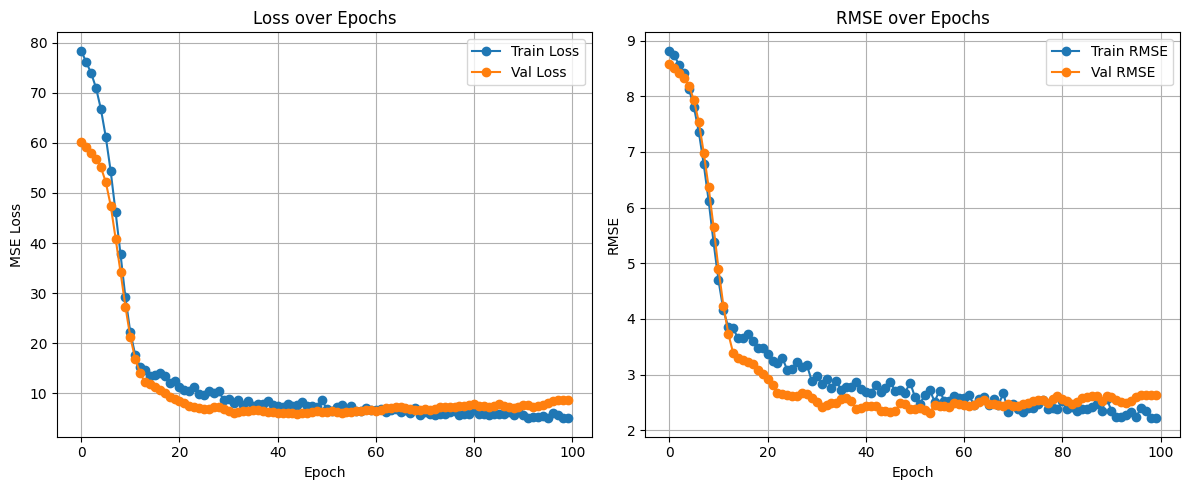

In [53]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# Plot RMSE
if 'rmse' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['rmse'], label='Train RMSE', marker='o')
    plt.plot(history.history['val_rmse'], label='Val RMSE', marker='o')
    plt.title('RMSE over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


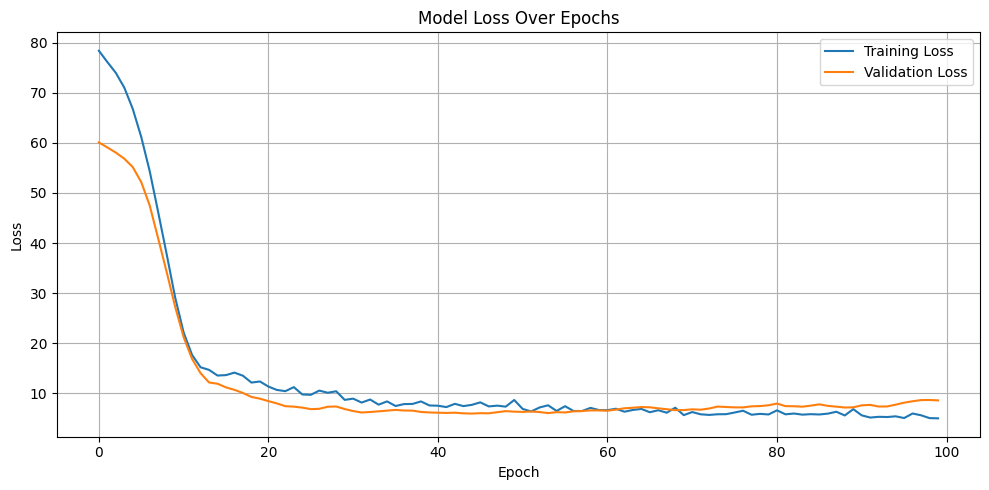

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


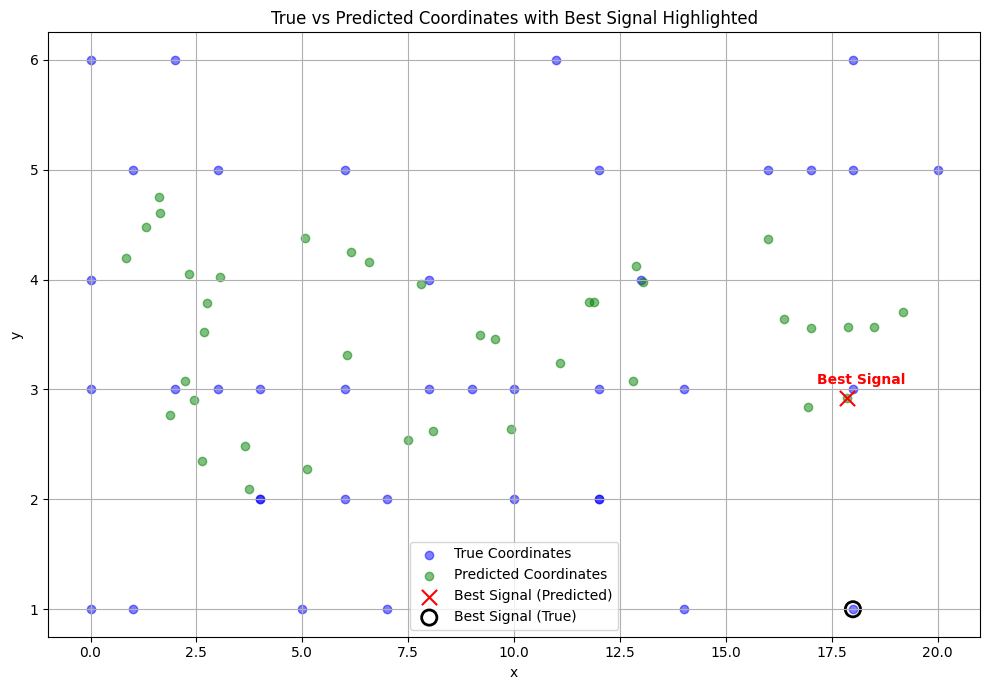

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Identify best signal index (lowest sum of RSSI values)
best_signal_index = np.argmin(np.sum(X_test.reshape(X_test.shape[0], -1), axis=1))
best_coords = y_predict[best_signal_index]
true_coords = y_test[best_signal_index]

plt.figure(figsize=(10, 7))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.5)
plt.scatter(y_predict[:, 0], y_predict[:, 1], c='green', label='Predicted Coordinates', alpha=0.5)
plt.scatter(best_coords[0], best_coords[1], c='red', label='Best Signal (Predicted)', s=120, marker='x')
plt.scatter(true_coords[0], true_coords[1], facecolors='none', edgecolors='black',
            label='Best Signal (True)', s=120, marker='o', linewidth=2)
plt.annotate('Best Signal',
             (best_coords[0], best_coords[1]),
             textcoords="offset points",
             xytext=(10, 10),
             ha='center', fontsize=10, color='red', weight='bold')

plt.title('True vs Predicted Coordinates with Best Signal Highlighted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## OTHER MODELS

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional,
                                     Conv1D, Input, Attention, LayerNormalization, MultiHeadAttention, Flatten)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tcn import TCN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Large.csv")  # Change to your actual file path
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

# Handle missing values
df.dropna(inplace=True)

# Extract features and targets
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values


X_rnn = X.reshape((X.shape[0], 4, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)


# Custom Euclidean loss for coordinate regression
def euclidean_distance_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)))

# Base training function
def compile_and_train(model, X_train, y_train, X_test, y_test, name, epochs=100, batch_size=16):
    model.compile(optimizer=Adam(0.001), loss=euclidean_distance_loss, metrics=['mse'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
    model.save(f'{name}.h5')

print("-------------------------1. Bidirectional LSTM------------------------------")
bi_lstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False, activation='tanh'), input_shape=(4, 1)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2)
])
compile_and_train(bi_lstm_model, X_train, y_train, X_test, y_test, 'bi_lstm')

print( "-------------------2. Stacked LSTM---------------------------")
stacked_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(4, 1)),
    Dropout(0.3),
    LSTM(32),
    Dense(2)
])
compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test, 'stacked_lstm')

print( "---------------------------3. GRU-----------------------------------")
gru_model = Sequential([
    GRU(64, activation='tanh', input_shape=(4, 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2)
])
compile_and_train(gru_model, X_train, y_train, X_test, y_test, 'gru')





-------------------------1. Bidirectional LSTM------------------------------


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 10.7901 - mse: 70.3098 - val_loss: 8.4113 - val_mse: 46.7924
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2176 - mse: 63.5573 - val_loss: 7.4315 - val_mse: 37.1607
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7523 - mse: 48.8645 - val_loss: 6.2978 - val_mse: 27.1136
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.2540 - mse: 33.2539 - val_loss: 5.2797 - val_mse: 18.4481
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7774 - mse: 20.8517 - val_loss: 4.9817 - val_mse: 15.5602
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1723 - mse: 16.2985 - val_loss: 4.8775 - val_mse: 15.0984
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5335 - mse: 13.1665 - val_loss: 4.1262 - val_mse: 10.7639
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4097 - mse: 12.3668 - val_loss: 3.7793 - val_mse: 8.9801
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

-------------------2. Stacked LSTM---------------------------
Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 11.3404 - mse: 79.1858 - val_loss: 8.6859 - val_mse: 51.5477
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.2477 - mse: 67.9015 - val_loss: 7.5149 - val_mse: 40.8797
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7291 - mse: 52.2852 - val_loss: 6.4238 - val_mse: 31.1559
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4743 - mse: 38.5136 - val_loss: 5.8332 - val_mse: 24.4673
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5162 - mse: 29.6193 - val_loss: 5.6105 - val_mse: 21.2797
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3694 - mse: 26.9229 - val_loss: 5.5394 - val_mse: 20.0046
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4439 - mse: 27.1432 - val_loss: 5.5039 - val_mse: 19.5076
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4944 - mse: 20.1389 - val_loss: 5.4924 - val_mse: 19.3010
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

---------------------------3. GRU-----------------------------------
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 10.7452 - mse: 71.6759 - val_loss: 7.9425 - val_mse: 43.3642
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7467 - mse: 51.6676 - val_loss: 6.7524 - val_mse: 33.2758
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1649 - mse: 44.5907 - val_loss: 5.8533 - val_mse: 24.5384
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8813 - mse: 31.1014 - val_loss: 5.5138 - val_mse: 19.7023
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0206 - mse: 22.6631 - val_loss: 5.5909 - val_mse: 19.6671
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9040 - mse: 21.8586 - val_loss: 5.6374 - val_mse: 20.5371
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.6965 - mse: 20.1563 - val_loss: 5.5020 - val_mse: 19.7965
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7106 - mse: 19.8562 - val_los

In [13]:
print("-------------------------------------4. LSTM + Attention (Simple custom attention)--------------------------------------------------")
from tensorflow.keras.layers import Lambda
from keras.layers import GlobalAveragePooling1D
input_layer = Input(shape=(4, 1))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
attention_out = GlobalAveragePooling1D()(attention)
dense_out = Dense(32, activation='relu')(attention_out)
output = Dense(2)(dense_out)

attention_model = Model(inputs=input_layer, outputs=output)
compile_and_train(attention_model, X_train, y_train, X_test, y_test, 'lstm_attention')

print("-----------------------------------5. Conv1D + LSTM (requires reshaping if needed)-----------------------------------------------------")
conv_lstm = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(4, 1)),
    LSTM(64),
    Dense(2)
])
compile_and_train(conv_lstm, X_train, y_train, X_test, y_test, 'conv1d_lstm')

print("---------------------------------------6. Temporal Convolutional Network (TCN)------------------------------------------------------------")
tcn_model = Sequential([
    TCN(64, input_shape=(4, 1)),
    Dense(2)
])
compile_and_train(tcn_model, X_train, y_train, X_test, y_test, 'tcn')

print('------------------------------------7. Transformer Encoder (Small Custom Version)-------------------------------------------------------------')
input_layer = Input(shape=(4, 1))
x = tf.keras.layers.Reshape((4, 1))(input_layer)
x = LayerNormalization(epsilon=1e-6)(x)
x = MultiHeadAttention(num_heads=2, key_dim=2)(x, x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(2)(x)
transformer_model = Model(inputs=input_layer, outputs=x)
compile_and_train(transformer_model, X_train, y_train, X_test, y_test, 'transformer')


-------------------------------------4. LSTM + Attention (Simple custom attention)--------------------------------------------------
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 11.5481 - mse: 81.6630 - val_loss: 8.6610 - val_mse: 51.6346
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1444 - mse: 65.7083 - val_loss: 8.0119 - val_mse: 45.9068
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8290 - mse: 62.7725 - val_loss: 7.2289 - val_mse: 38.9547
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7064 - mse: 51.6850 - val_loss: 6.3907 - val_mse: 30.2234
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8075 - mse: 41.3344 - val_loss: 5.7231 - val_mse: 21.7913
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4590 - mse: 28.2551 - val_loss: 5.3572 - val_mse: 17.6599
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6497 - mse: 20.2950 - val_loss: 5.3677 - val_mse: 18.7566
Epoch 8/100
10/10 ━━━━━━━

-----------------------------------5. Conv1D + LSTM (requires reshaping if needed)-----------------------------------------------------
Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 10.8133 - mse: 74.4830 - val_loss: 7.7860 - val_mse: 42.8505
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9036 - mse: 52.3926 - val_loss: 6.2775 - val_mse: 29.5864
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7571 - mse: 41.0232 - val_loss: 5.6602 - val_mse: 22.8477
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7206 - mse: 30.3696 - val_loss: 5.4426 - val_mse: 19.9156
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.1558 - mse: 25.1137 - val_loss: 5.3406 - val_mse: 18.4932
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.8191 - mse: 22.0522 - val_loss: 5.3929 - val_mse: 18.3205
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5092 - mse: 19.3575 - val_loss: 5.2004 - val_mse: 17.0968
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2270 - mse: 17.4564 - val_loss: 4.9862 - val_mse: 16.2195
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


---------------------------------------6. Temporal Convolutional Network (TCN)------------------------------------------------------------



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 141.7224 - mse: 13802.3750 - val_loss: 93.3977 - val_mse: 4736.2603
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 59.6199 - mse: 2454.7722 - val_loss: 35.8054 - val_mse: 713.6165
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 27.2918 - mse: 479.3966 - val_loss: 14.0323 - val_mse: 119.7858
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.0751 - mse: 90.8608 - val_loss: 8.3581 - val_mse: 43.4177
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.5387 - mse: 37.9483 - val_loss: 12.5474 - val_mse: 85.6982
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.8590 - mse: 59.9307 - val_loss: 14.1617 - val_mse: 122.7102
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.8502 - mse: 82.2107 - val_loss: 15.7305 - val_mse: 150.7516
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.5776 - mse: 98.9974 - val_loss: 7.6515 - val_mse: 38.9840
Epoch 9/100
10/

------------------------------------7. Transformer Encoder (Small Custom Version)-------------------------------------------------------------
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 10.8910 - mse: 75.8232 - val_loss: 9.6181 - val_mse: 60.6518
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8934 - mse: 76.4264 - val_loss: 9.6059 - val_mse: 60.5349
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.7452 - mse: 72.7544 - val_loss: 9.5937 - val_mse: 60.4187
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.6415 - mse: 83.4798 - val_loss: 9.5816 - val_mse: 60.3025
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7494 - mse: 73.8207 - val_loss: 9.5694 - val_mse: 60.1864
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.3204 - mse: 79.1153 - val_loss: 9.5573 - val_mse: 60.0706
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9311 - mse: 76.0396 - val_loss: 9.5451 - val_mse: 59.9551
Epoch 8/100
10/

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# ----------------------- Config -----------------------
model_names = [
    'bi_lstm', 'stacked_lstm', 'gru',
    'lstm_attention', 'conv1d_lstm', 'tcn', 'transformer'
]
threshold = 6.00

# ----------------------- Helper Functions -----------------------
def euclidean_distance(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

def classification_metrics(y_true, y_pred, threshold=6.5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    acc = np.mean(distances <= threshold) * 100

    y_true_bin = np.ones_like(distances)
    y_pred_bin = (distances <= threshold).astype(int)

    prec = precision_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    return acc, prec, rec, f1

# ----------------------- Evaluation -----------------------
results = []
for model_name in model_names:
    try:
        print(f"🔄 Evaluating: {model_name}")
        model = tf.keras.models.load_model(f"{model_name}.h5", compile=False)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ed = euclidean_distance(y_test, y_pred)

        # Classification-like Metrics
        acc, prec, rec, f1 = classification_metrics(y_test, y_pred, threshold)

        # Store formatted results
        results.append({
            "Model": model_name,
            "Accuracy": f"{acc:.2f} ± 0.00",
            "Precision": f"{prec:.2f} ± 0.00",
            "Recall": f"{rec:.2f} ± 0.00",
            "F1 Score": f"{f1:.2f} ± 0.00",
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R2 Score": r2,
            "Euclidean Distance": ed
        })
    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

# ----------------------- Add Previous Results -----------------------

# Manually add prior baseline models
baseline_models = [
    {"Model": "RNN",           "Accuracy": "88.61 ± 5.47", "Precision": "1.00 ± 0.00", "Recall": "0.89 ± 0.05", "F1 Score": "0.94 ± 0.03"},
    {"Model": "CNN",           "Accuracy": "69.54 ± 7.38", "Precision": "1.00 ± 0.00", "Recall": "0.70 ± 0.07", "F1 Score": "0.82 ± 0.05"},
    {"Model": "Improved RNN",  "Accuracy": "93.25 ± 6.10", "Precision": "1.00 ± 0.00", "Recall": "0.93 ± 0.06", "F1 Score": "0.96 ± 0.03"},
]

results_class = baseline_models + [
    {
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"]
    }
    for r in results
]

# ----------------------- Display Tables -----------------------

# 📊 Classification-style Table
classification_table = [
    [r["Model"], r["Accuracy"], r["Precision"], r["Recall"], r["F1 Score"]]
    for r in results_class
]
headers_class = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print("\n📌 Classification-style Evaluation Metrics")
print(tabulate(classification_table, headers=headers_class, tablefmt="grid"))

# 📊 Regression Table
regression_df = pd.DataFrame(results)
regression_df = regression_df[["Model", "RMSE", "MAE", "MSE", "R2 Score", "Euclidean Distance"]]
regression_df = regression_df.sort_values(by="RMSE")

print("\n📌 Regression Metrics (sorted by RMSE):")
print(regression_df.to_string(index=False))

🔄 Evaluating: bi_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
🔄 Evaluating: stacked_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
🔄 Evaluating: gru
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
🔄 Evaluating: lstm_attention
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
🔄 Evaluating: conv1d_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
🔄 Evaluating: tcn
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step
🔄 Evaluating: transformer
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

📌 Classification-style Evaluation Metrics
+----------------+---------------+-------------+-------------+-------------+
| Model          | Accuracy      | Precision   | Recall      | F1 Score    |
+================+===============+=============+=============+=============+
| RNN            | 88.61 ± 5.47  | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+----------------+---------------+-------------+-------------+-------------+
| CNN            | 69.54 ± 7.38  | 1.00 ± 0.00 | 0.70 ± 0.07 | 0.82 ± 0.05 |
+----------------+---------------+-------------+---------

: 

### New and Updated Other Models with Visualization

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional,
                                     Conv1D, Input, Attention, LayerNormalization, MultiHeadAttention, Flatten)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tcn import TCN
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Load the data
df = pd.read_csv("D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Large.csv")  # Change to your actual file path
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

# Handle missing values
df.dropna(inplace=True)

# Extract features and targets
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

# Prepare data for LSTM: reshape to (samples, time steps, features)
X_rnn = X.reshape((X.shape[0], 4, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)



# Custom Euclidean loss for coordinate regression
def euclidean_distance_loss(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)))

# Base training function
def compile_and_train(model, X_train, y_train, X_test, y_test, name, epochs=100, batch_size=16):
    model.compile(optimizer=Adam(0.001), loss=euclidean_distance_loss, metrics=['mse'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                        batch_size=batch_size, verbose=1)
    model.save(f'updatedModels/{name}.h5')
    return history

# Ensure the updatedModels folder exists
os.makedirs('updatedModels', exist_ok=True)



In [29]:
bi_lstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False, activation='tanh'), input_shape=(4,1)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2)
])

compile_and_train(bi_lstm_model, X_train, y_train, X_test, y_test, 'up_bi_lstm')
# Train the model and save the history
history = compile_and_train(bi_lstm_model, X_train, y_train, X_test, y_test, 'up_bi_lstm')


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 9.4970 - mse: 56.6468 - val_loss: 7.3478 - val_mse: 37.3098
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.3810 - mse: 43.8496 - val_loss: 5.9630 - val_mse: 24.8253
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3810 - mse: 26.9828 - val_loss: 5.2236 - val_mse: 17.8931
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9308 - mse: 22.0364 - val_loss: 5.2861 - val_mse: 17.4640
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2027 - mse: 16.5422 - val_loss: 5.0374 - val_mse: 15.9161
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9113 - mse: 14.9137 - val_loss: 4.5382 - val_mse: 13.3434
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5915 - mse: 13.0326 - val_loss: 4.0929 - val_mse: 10.8161
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4357 - mse: 12.3785 - val_loss: 3.7799 - val_mse: 9.1090
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.2955 - mse: 8.7921 - val_loss: 2.6619 - val_mse: 4.2618
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4274 - mse: 8.4831 - val_loss: 2.5477 - val_mse: 3.9811
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5956 - mse: 8.7581 - val_loss: 2.5589 - val_mse: 3.9518
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2235 - mse: 7.4418 - val_loss: 2.5315 - val_mse: 3.9910
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2350 - mse: 7.2454 - val_loss: 2.5458 - val_mse: 4.0212
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5391 - mse: 10.2156 - val_loss: 2.5250 - val_mse: 3.8795
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5084 - mse: 8.3186 - val_loss: 2.5278 - val_mse: 3.9204
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1306 - mse: 7.2674 - val_loss: 2.5604 - val_mse: 4.0786
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - l

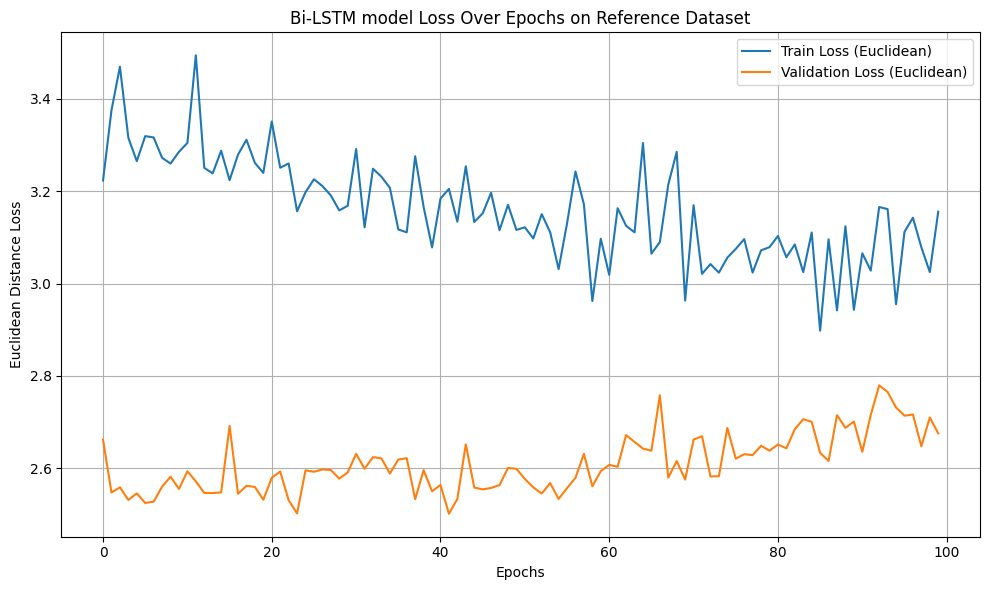

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step


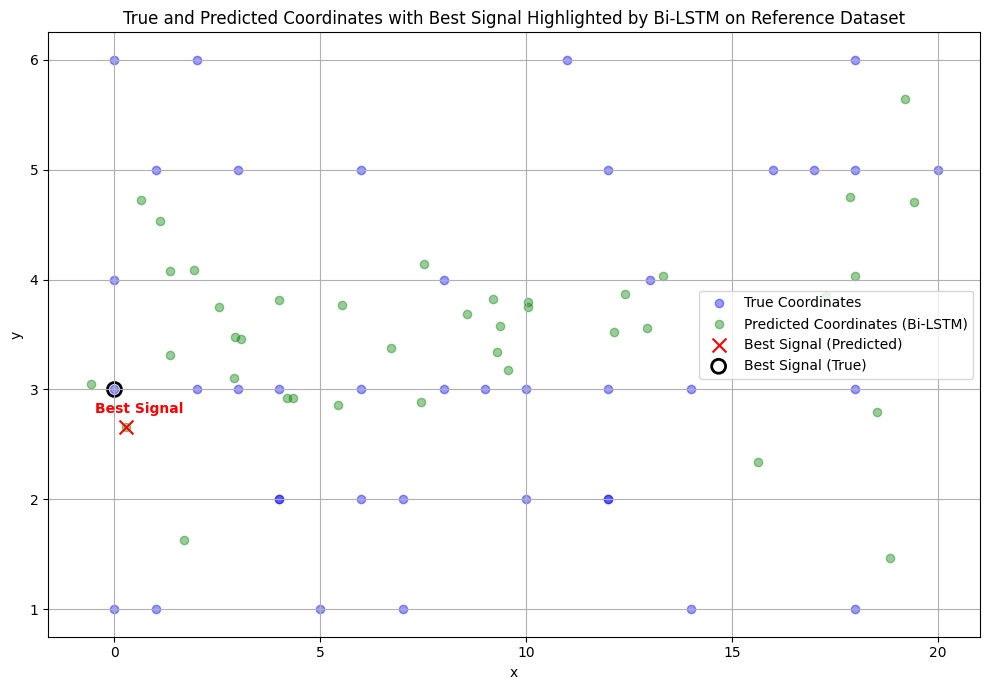

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Bi-LSTM model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates (Bi-LSTM)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by Bi-LSTM on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_bi_lstm.h5', X_test, y_test, euclidean_distance_loss)


In [37]:

stacked_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(4,1)),
    Dropout(0.3),
    LSTM(32),
    Dense(2, activation='linear'),
    BatchNormalization()
])
compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test, 'up_stacked_lstm')


# Train the model and save the history
history = compile_and_train(stacked_lstm, X_train, y_train, X_test, y_test,  'up_stacked_lstm')


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 11.1752 - mse: 76.3995 - val_loss: 9.6970 - val_mse: 62.0275
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7832 - mse: 71.7543 - val_loss: 9.6072 - val_mse: 60.8083
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2138 - mse: 77.3225 - val_loss: 9.5343 - val_mse: 59.8740
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.7974 - mse: 82.4767 - val_loss: 9.4388 - val_mse: 58.7794
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.5618 - mse: 81.0032 - val_loss: 9.3588 - val_mse: 57.6837
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0058 - mse: 86.2868 - val_loss: 9.3370 - val_mse: 57.2653
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.3449 - mse: 77.0185 - val_loss: 9.3566 - val_mse: 57.5019
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.5185 - mse: 79.1430 - val_loss: 9.3576 - val_mse: 57.7741
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 9.5414 - mse: 58.3819 - val_loss: 8.1691 - val_mse: 43.6596
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0104 - mse: 63.1234 - val_loss: 8.1558 - val_mse: 43.7157
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.5774 - mse: 58.2650 - val_loss: 8.1411 - val_mse: 43.6506
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.3485 - mse: 65.7449 - val_loss: 8.1607 - val_mse: 43.9329
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2447 - mse: 54.3135 - val_loss: 8.1992 - val_mse: 44.0522
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.8916 - mse: 60.9382 - val_loss: 8.2243 - val_mse: 44.2535
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3998 - mse: 56.4458 - val_loss: 8.2944 - val_mse: 44.8935
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.8710 - mse: 61.1293 - val_loss: 8.2766 - val_mse: 44.8124
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━

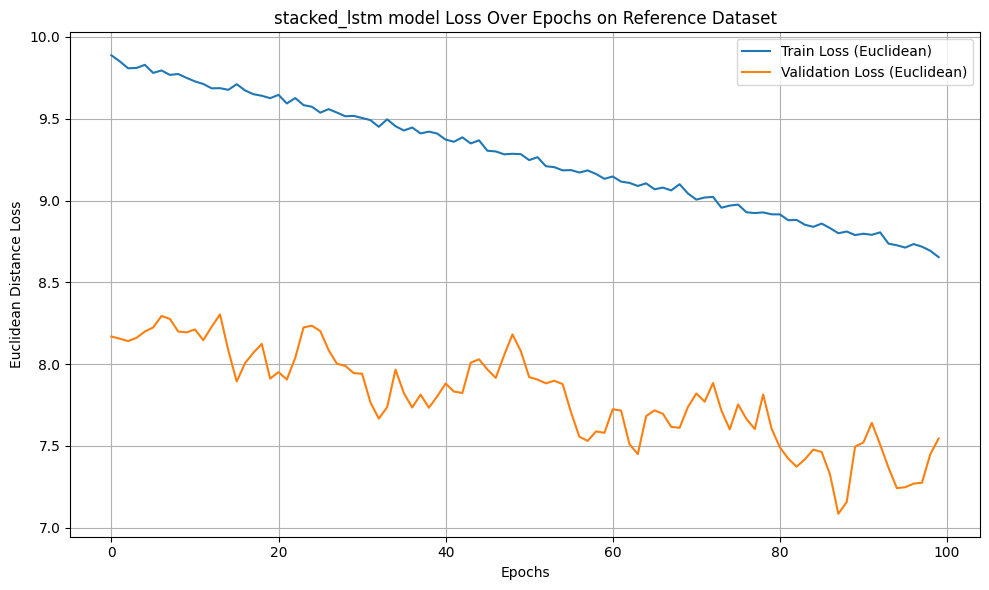

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step


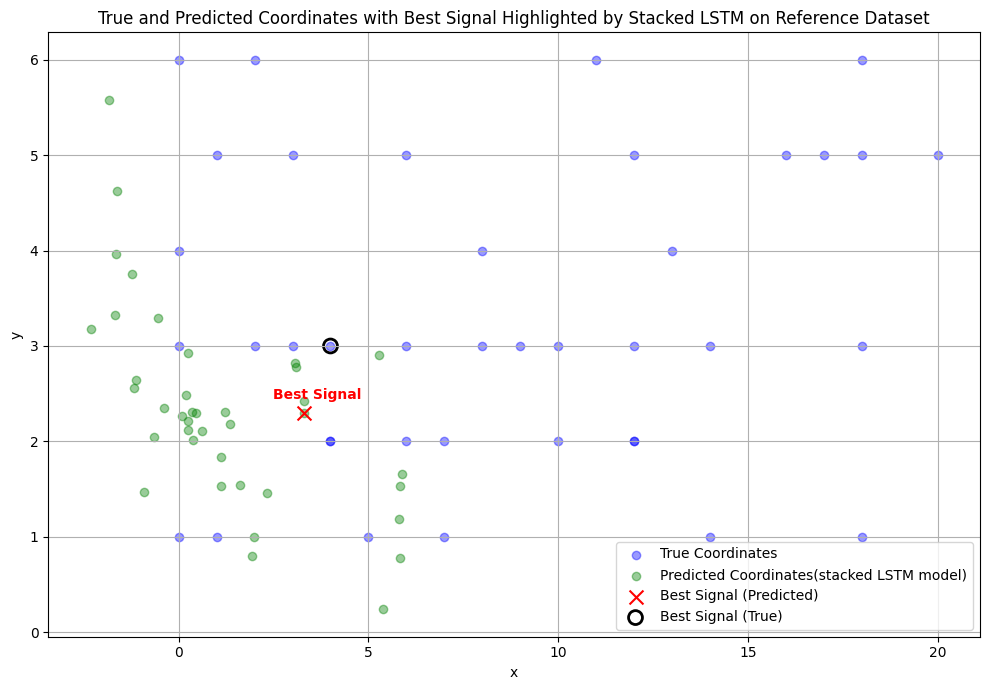

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('stacked_lstm model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(stacked LSTM model)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by Stacked LSTM on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_stacked_lstm.h5', X_test, y_test, euclidean_distance_loss)


In [42]:

gru_model = Sequential([
    GRU(64, activation='tanh', input_shape=(4,1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2)
])

compile_and_train(gru_model, X_train, y_train, X_test, y_test, 'up_gru')

# Train the model and save the history
history = compile_and_train(gru_model, X_train, y_train, X_test, y_test, 'up_gru')

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 11.6782 - mse: 80.2447 - val_loss: 8.6099 - val_mse: 50.0115
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.1173 - mse: 65.3805 - val_loss: 7.2631 - val_mse: 37.8865
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3127 - mse: 46.4462 - val_loss: 6.1234 - val_mse: 27.5464
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.9685 - mse: 33.8663 - val_loss: 5.7346 - val_mse: 21.7831
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.4669 - mse: 27.1185 - val_loss: 5.7711 - val_mse: 20.2424
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0202 - mse: 22.7747 - val_loss: 5.6960 - val_mse: 20.0606
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7951 - mse: 20.7321 - val_loss: 5.5890 - val_mse: 20.2650
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.5724 - mse: 20.0759 - val_loss: 5.5120 - val_mse: 20.4902
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.4083 - mse: 8.5931 - val_loss: 2.7532 - val_mse: 4.7964
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1933 - mse: 7.4929 - val_loss: 2.6493 - val_mse: 4.4645
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1917 - mse: 7.6375 - val_loss: 2.7078 - val_mse: 4.7096
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4303 - mse: 8.5224 - val_loss: 2.6900 - val_mse: 4.6131
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5724 - mse: 9.3306 - val_loss: 2.7246 - val_mse: 4.7717
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2508 - mse: 7.6843 - val_loss: 2.7399 - val_mse: 4.7530
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0465 - mse: 7.2012 - val_loss: 2.7278 - val_mse: 4.7595
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2480 - mse: 7.8622 - val_loss: 2.7452 - val_mse: 4.8995
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

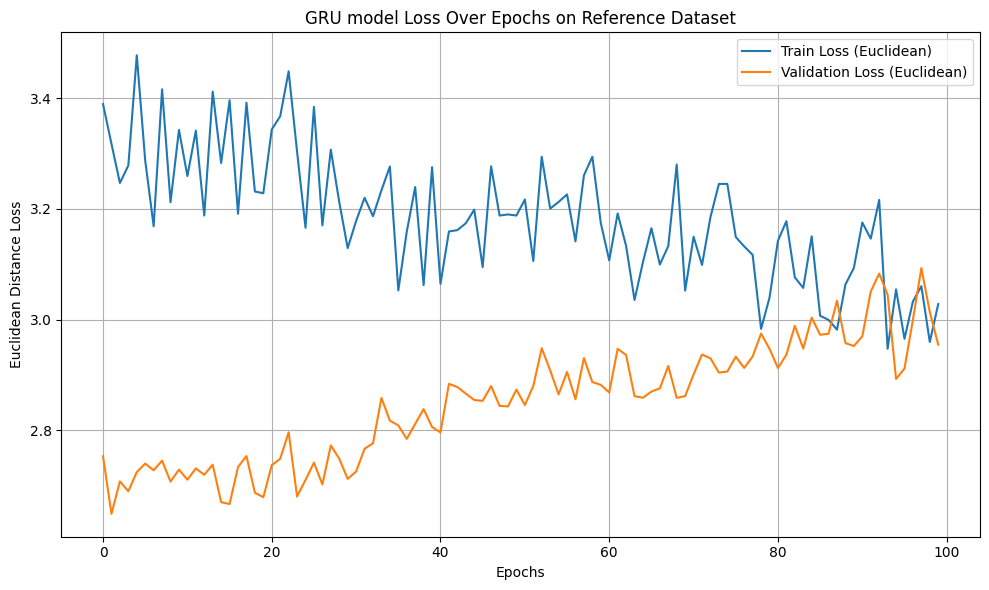

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step


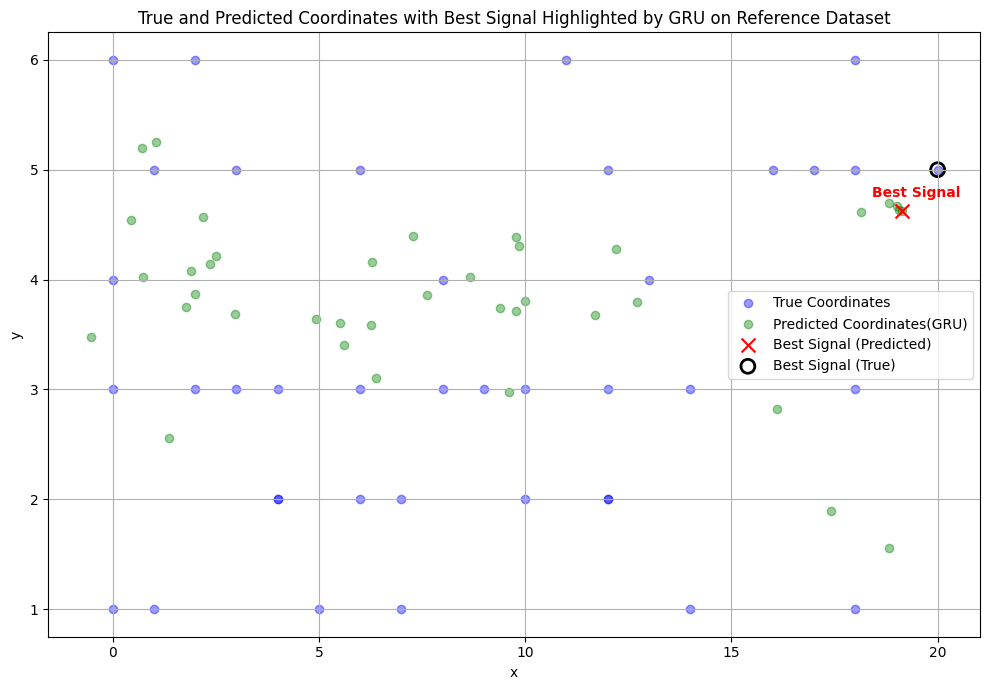

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('GRU model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(GRU)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by GRU on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_gru.h5', X_test, y_test, euclidean_distance_loss)


## lstm_attention

In [45]:

from tensorflow.keras.layers import Lambda
from keras.layers import GlobalAveragePooling1D
input_layer = Input(shape=(4,1))  # Adjusted input shape to match the reshaped data
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
attention_out = GlobalAveragePooling1D()(attention)
dense_out = Dense(32, activation='relu')(attention_out)
output = Dense(2)(dense_out)

attention_model = Model(inputs=input_layer, outputs=output)

compile_and_train(attention_model, X_train, y_train, X_test, y_test, 'up_lstm_attention')

# Train the model and save the history
history = compile_and_train(attention_model, X_train, y_train, X_test, y_test, 'up_lstm_attention')


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 10.8174 - mse: 72.4917 - val_loss: 9.0161 - val_mse: 53.7570
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.4342 - mse: 67.5344 - val_loss: 8.2147 - val_mse: 45.4986
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5790 - mse: 59.6724 - val_loss: 7.3853 - val_mse: 37.4565
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0383 - mse: 51.8286 - val_loss: 6.4127 - val_mse: 28.8038
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7988 - mse: 30.8795 - val_loss: 5.4491 - val_mse: 20.3499
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1169 - mse: 24.0251 - val_loss: 5.1585 - val_mse: 16.9514
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.4099 - mse: 18.6503 - val_loss: 5.5224 - val_mse: 19.5941
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5573 - mse: 19.1448 - val_loss: 5.1726 - val_mse: 17.2365
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.2915 - mse: 8.6138 - val_loss: 2.5447 - val_mse: 4.1193
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3426 - mse: 8.9580 - val_loss: 2.5207 - val_mse: 4.0276
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1328 - mse: 7.5576 - val_loss: 2.5182 - val_mse: 4.0791
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.3824 - mse: 8.5985 - val_loss: 2.5532 - val_mse: 4.2298
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9741 - mse: 7.0250 - val_loss: 2.5320 - val_mse: 4.0613
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1527 - mse: 8.0621 - val_loss: 2.5026 - val_mse: 4.0061
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9510 - mse: 7.0950 - val_loss: 2.5327 - val_mse: 4.0934
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9761 - mse: 6.8648 - val_loss: 2.5117 - val_mse: 3.9804
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

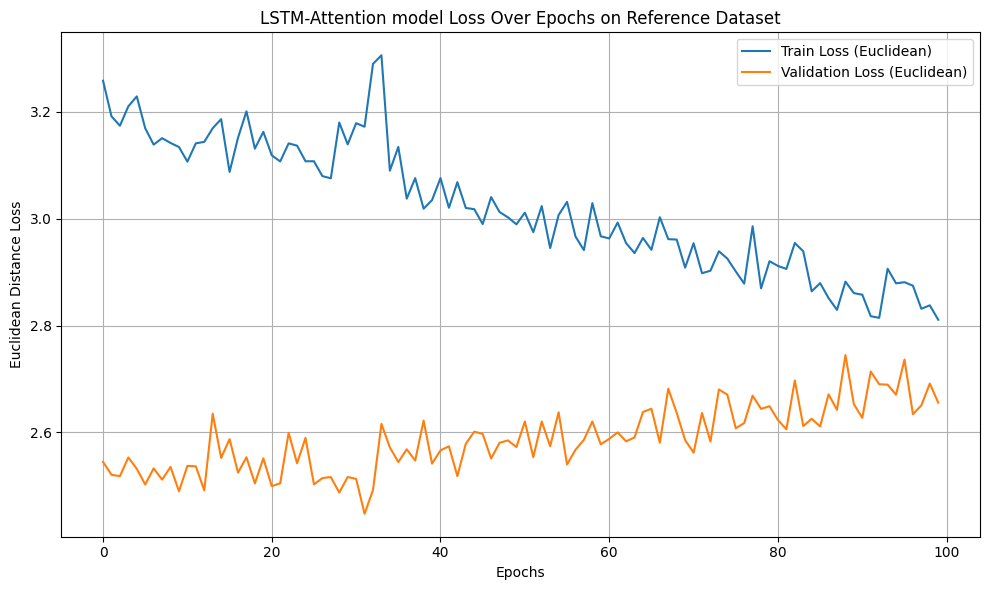

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


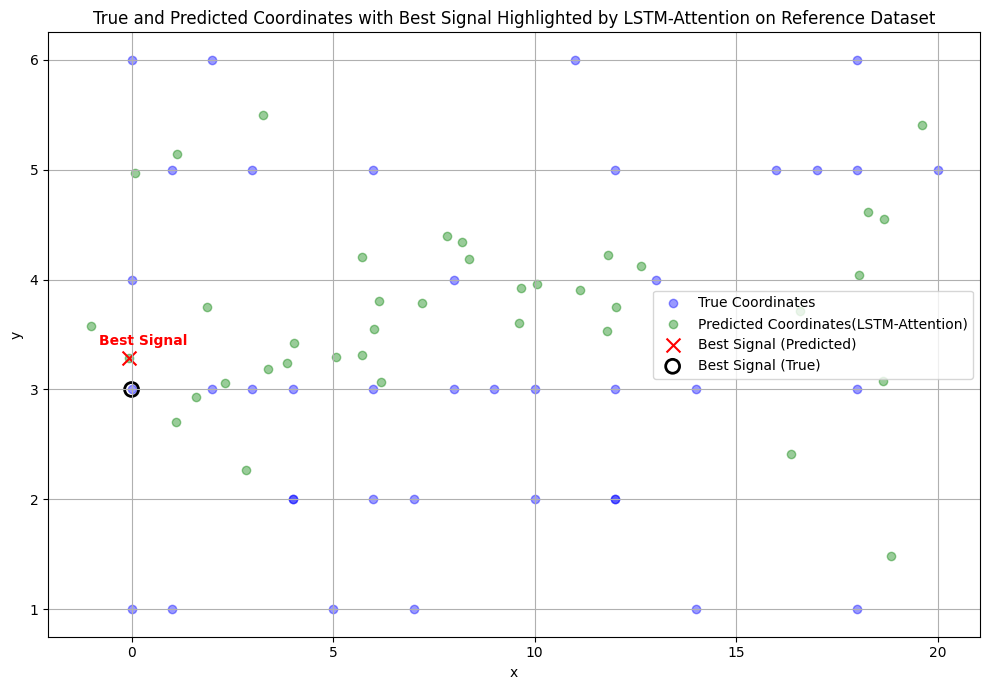

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('LSTM-Attention model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(LSTM-Attention)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by LSTM-Attention on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_lstm_attention.h5', X_test, y_test, euclidean_distance_loss)


In [47]:

conv_lstm = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(4,1)),
    BatchNormalization(),
    LSTM(64),
    Dense(2, activation='linear'),
    Dropout(0.3)
])


compile_and_train(conv_lstm, X_train, y_train, X_test, y_test, 'up_conv1d_lstm')


# Train the model and save the history
history = compile_and_train(conv_lstm, X_train, y_train, X_test, y_test, 'up_conv1d_lstm')


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 11.4775 - mse: 80.5565 - val_loss: 8.5123 - val_mse: 51.2343
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8016 - mse: 72.7849 - val_loss: 7.5496 - val_mse: 41.8603
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.4748 - mse: 57.5098 - val_loss: 7.0629 - val_mse: 37.1978
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.7767 - mse: 51.6910 - val_loss: 6.6296 - val_mse: 32.8469
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3154 - mse: 48.5892 - val_loss: 6.1806 - val_mse: 28.2295
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4515 - mse: 40.9871 - val_loss: 5.6825 - val_mse: 23.2326
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.8734 - mse: 33.1203 - val_loss: 5.3203 - val_mse: 20.0098
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1101 - mse: 36.7586 - val_loss: 5.3026 - val_mse: 19.6925
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/ste

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.6603 - mse: 20.6024 - val_loss: 4.0012 - val_mse: 11.1143
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.3287 - mse: 34.1442 - val_loss: 3.8489 - val_mse: 10.3250
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4842 - mse: 28.2133 - val_loss: 3.7002 - val_mse: 9.6826
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3175 - mse: 27.0869 - val_loss: 3.7738 - val_mse: 10.0980
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7968 - mse: 22.0921 - val_loss: 3.8711 - val_mse: 10.5884
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1911 - mse: 29.4594 - val_loss: 3.9336 - val_mse: 10.9988
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.0030 - mse: 24.8965 - val_loss: 3.8093 - val_mse: 10.1803
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2981 - mse: 28.1844 - val_loss: 3.8884 - val_mse: 10.6060
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

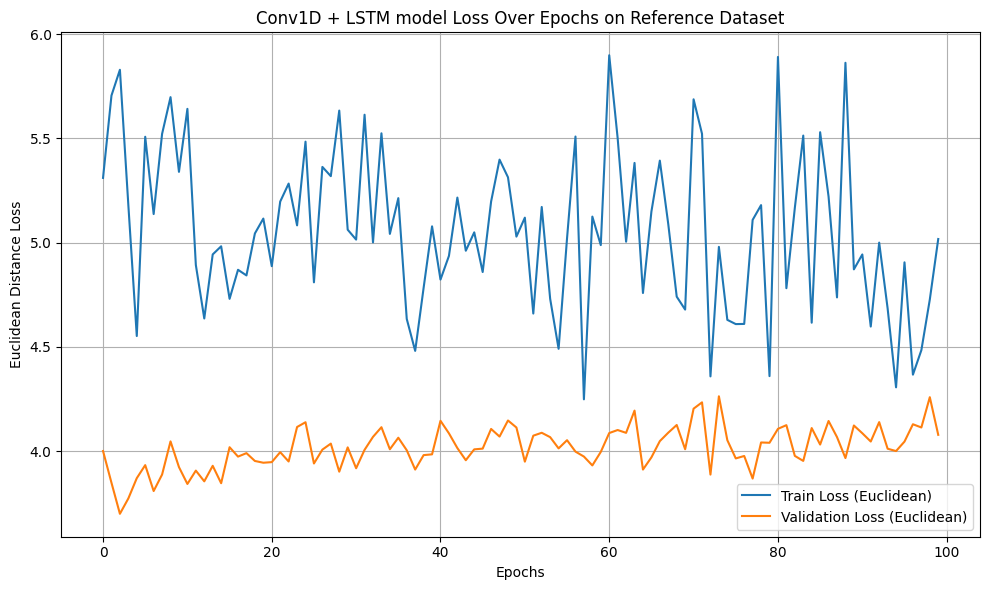

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


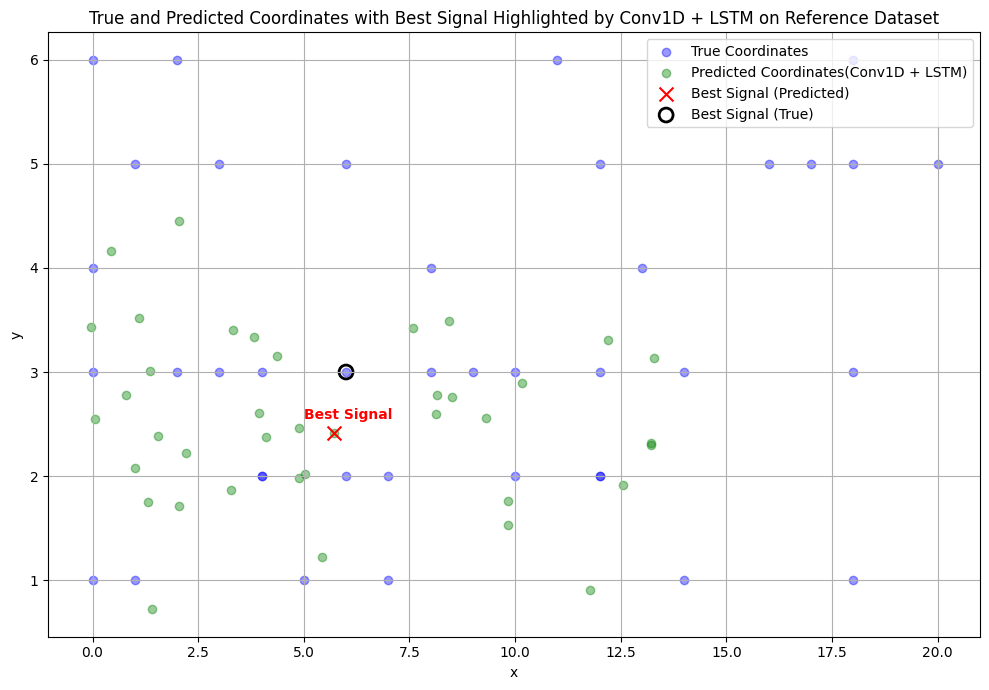

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Conv1D + LSTM model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(Conv1D + LSTM)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by Conv1D + LSTM on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_conv1d_lstm.h5', X_test, y_test, euclidean_distance_loss)


In [50]:

tcn_model = Sequential([
    TCN(64, input_shape=(4,1), return_sequences=False, kernel_size=2, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2, activation='linear', kernel_regularizer=l2(0.001))
])

compile_and_train(tcn_model, X_train, y_train, X_test, y_test, 'up_tcn')

# Train the model and save the history
history = compile_and_train(tcn_model, X_train, y_train, X_test, y_test, 'up_tcn')



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 313.8646 - mse: 71531.9219 - val_loss: 63.0105 - val_mse: 2246.1321
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 86.8363 - mse: 5562.9399 - val_loss: 28.8802 - val_mse: 463.9280
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 46.6599 - mse: 1557.0833 - val_loss: 12.8509 - val_mse: 137.8457
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 28.4972 - mse: 507.6465 - val_loss: 18.7876 - val_mse: 229.1897
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.4020 - mse: 441.3233 - val_loss: 8.9426 - val_mse: 50.2823
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.6994 - mse: 273.7570 - val_loss: 6.8945 - val_mse: 28.7777
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.8106 - mse: 153.2936 - val_loss: 6.2258 - val_mse: 24.3018
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.6820 - mse: 127.3831 - val_loss: 6.2610 - val_mse: 24.5653
Epoch 9/1

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 4.4258 - mse: 12.8237 - val_loss: 4.3739 - val_mse: 12.2503
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.8144 - mse: 15.3799 - val_loss: 3.3470 - val_mse: 7.2698
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4816 - mse: 13.2085 - val_loss: 3.5057 - val_mse: 7.5970
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1902 - mse: 11.7607 - val_loss: 3.2889 - val_mse: 6.6468
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5215 - mse: 14.0844 - val_loss: 2.9136 - val_mse: 5.0939
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.2452 - mse: 11.6094 - val_loss: 3.5608 - val_mse: 8.1423
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0994 - mse: 11.3064 - val_loss: 3.2681 - val_mse: 6.4200
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0161 - mse: 11.0304 - val_loss: 3.1125 - val_mse: 5.8800
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms

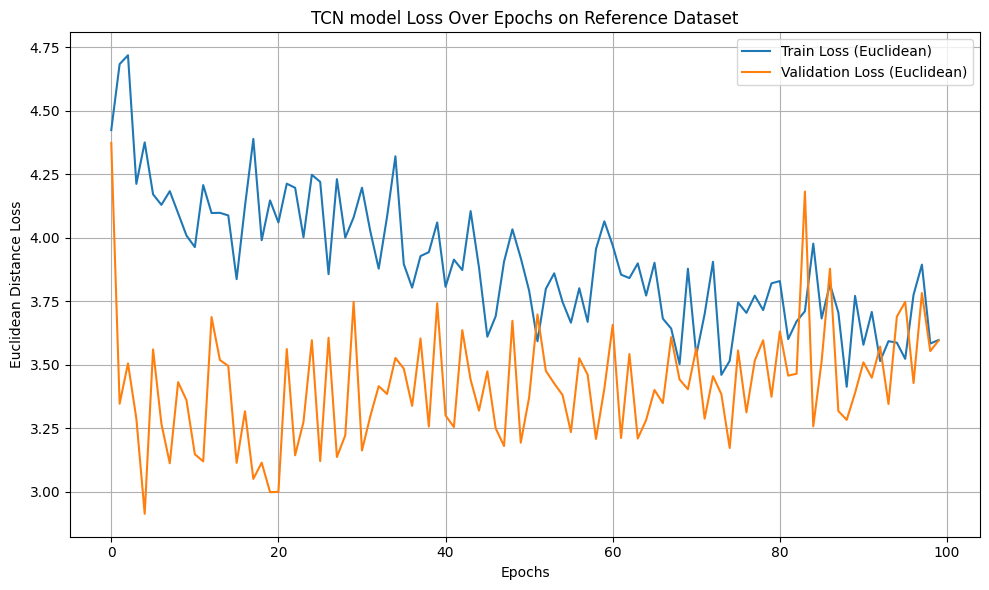

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step


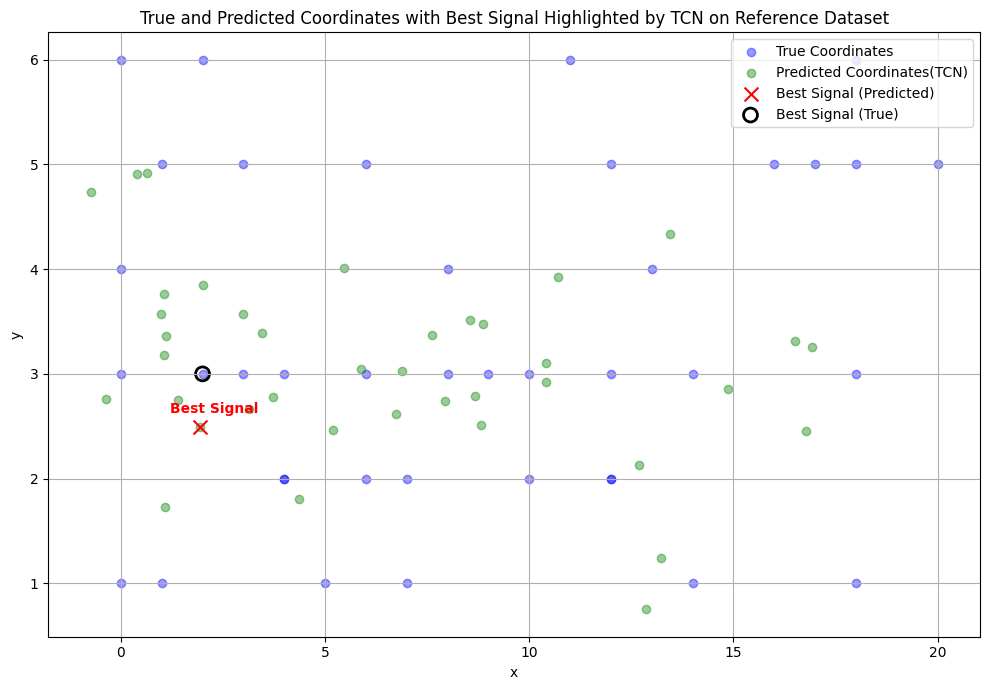

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('TCN model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(TCN)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by TCN on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_tcn.h5', X_test, y_test, euclidean_distance_loss)


In [52]:
# 
input_layer = Input(shape=(4,1))  # Adjusted input shape to match the reshaped data
x = tf.keras.layers.Reshape((4,1))(input_layer)
x = LayerNormalization(epsilon=1e-6)(x)
x = MultiHeadAttention(num_heads=2, key_dim=2)(x, x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(2)(x)
transformer_model = Model(inputs=input_layer, outputs=x)

compile_and_train(transformer_model, X_train, y_train, X_test, y_test, 'up_transformer')

# Train the model and save the history
history = compile_and_train(transformer_model, X_train, y_train, X_test, y_test, 'up_transformer')


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 10.7501 - mse: 72.5811 - val_loss: 9.6181 - val_mse: 60.6516
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.2141 - mse: 77.7786 - val_loss: 9.6058 - val_mse: 60.5343
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.7169 - mse: 83.0481 - val_loss: 9.5936 - val_mse: 60.4172
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.6330 - mse: 83.5060 - val_loss: 9.5814 - val_mse: 60.3008
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.1664 - mse: 76.4218 - val_loss: 9.5692 - val_mse: 60.1847
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.0472 - mse: 75.9699 - val_loss: 9.5570 - val_mse: 60.0687
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.2772 - mse: 79.6127 - val_loss: 9.5448 - val_mse: 59.9528
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.2763 - mse: 77.6904 - val_loss: 9.5327 - val_mse: 59.8371
Epoch 9/100
10/10 ━━━━━━━━━━━━━━

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 10.3545 - mse: 69.1349 - val_loss: 8.4721 - val_mse: 50.0644
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9221 - mse: 64.2907 - val_loss: 8.4613 - val_mse: 49.9675
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.3636 - mse: 68.3288 - val_loss: 8.4507 - val_mse: 49.8703
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.6449 - mse: 60.1503 - val_loss: 8.4403 - val_mse: 49.7738
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0088 - mse: 66.6453 - val_loss: 8.4301 - val_mse: 49.6775
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.4885 - mse: 69.6853 - val_loss: 8.4198 - val_mse: 49.5808
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.5358 - mse: 71.4283 - val_loss: 8.4097 - val_mse: 49.4848
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5346 - mse: 69.6375 - val_loss: 8.3996 - val_mse: 49.3891
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━

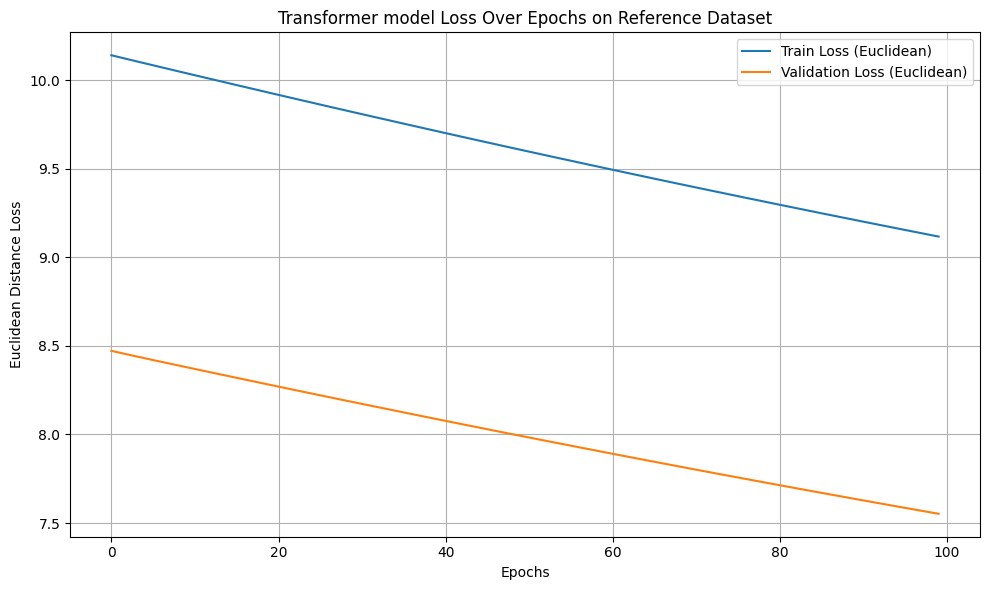

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


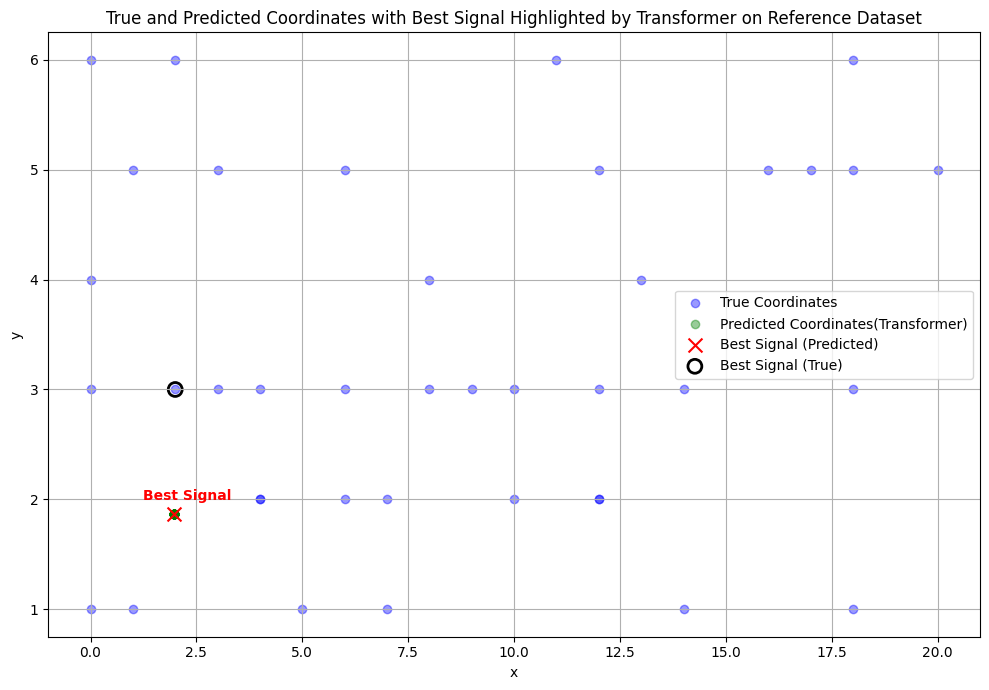

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === 1. Plot Euclidean Loss vs Epochs ===
def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss (Euclidean)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Euclidean)')
    plt.title('Transformer model Loss Over Epochs on Reference Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Euclidean Distance Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === 2. Plot Best Signal Prediction vs Ground Truth ===
def plot_best_signal(model_path, X_test, y_test, loss_fn):
    # Load trained model
    model = load_model(model_path, custom_objects={'euclidean_distance_loss': loss_fn})

    # Predict test set
    y_pred = model.predict(X_test)

    # Compute Euclidean error for each prediction
    errors = np.linalg.norm(y_pred - y_test, axis=1)

    # Get index with minimum error
    best_index = np.argmin(errors)

    # Extract best predicted and true coordinates
    best_pred_coords = y_pred[best_index]
    best_true_coords = y_test[best_index]

    # === Plotting all points + Best Signal Highlight ===
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates', alpha=0.4)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], c='green', label='Predicted Coordinates(Transformer)', alpha=0.4)
    plt.scatter(best_pred_coords[0], best_pred_coords[1], c='red', s=100, marker='x', label='Best Signal (Predicted)')
    plt.scatter(best_true_coords[0], best_true_coords[1], edgecolors='black', facecolors='none',
                s=100, marker='o', linewidths=2, label='Best Signal (True)')

    # Annotate
    plt.annotate('Best Signal',
                 (best_pred_coords[0], best_pred_coords[1]),
                 textcoords="offset points",
                 xytext=(10, 10),
                 ha='center', fontsize=10, color='red', weight='bold')

    plt.title('True and Predicted Coordinates with Best Signal Highlighted by Transformer on Reference Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_training_history(history)
plot_best_signal('updatedModels/up_transformer.h5', X_test, y_test, euclidean_distance_loss)


In [61]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# ----------------------- Config -----------------------
model_names = [
    'updatedModels/up_bi_lstm', 'updatedModels/up_stacked_lstm', 'updatedModels/up_gru',
    'updatedModels/up_lstm_attention', 'updatedModels/up_conv1d_lstm', 'updatedModels/up_tcn', 'updatedModels/up_transformer'
]
threshold = 6.5

# ----------------------- Helper Functions -----------------------
def euclidean_distance(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

def classification_metrics(y_true, y_pred, threshold=6.5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    acc = np.mean(distances <= threshold) * 100

    y_true_bin = np.ones_like(distances)
    y_pred_bin = (distances <= threshold).astype(int)

    prec = precision_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    return acc, prec, rec, f1

# ----------------------- Evaluation -----------------------
results = []
for model_name in model_names:
    try:
        print(f"🔄 Evaluating: {model_name}")
        model = tf.keras.models.load_model(f"{model_name}.h5", compile=False)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ed = euclidean_distance(y_test, y_pred)

        # Classification-like Metrics
        acc, prec, rec, f1 = classification_metrics(y_test, y_pred, threshold)

        # Store formatted results
        results.append({
            "Model": model_name,
            "Accuracy": f"{acc:.2f} ± 0.00",
            "Precision": f"{prec:.2f} ± 0.00",
            "Recall": f"{rec:.2f} ± 0.00",
            "F1 Score": f"{f1:.2f} ± 0.00",
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R2 Score": r2,
            "Euclidean Distance": ed
        })
    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

# ----------------------- Add Previous Results -----------------------

# Manually add prior baseline models
baseline_models = [
    {"Model": "RNN",           "Accuracy": "88.61 ± 5.47", "Precision": "1.00 ± 0.00", "Recall": "0.89 ± 0.05", "F1 Score": "0.94 ± 0.03"},
    {"Model": "CNN",           "Accuracy": "69.54 ± 7.38", "Precision": "1.00 ± 0.00", "Recall": "0.70 ± 0.07", "F1 Score": "0.82 ± 0.05"},
    {"Model": "Improved RNN",  "Accuracy": "93.25 ± 6.10", "Precision": "1.00 ± 0.00", "Recall": "0.93 ± 0.06", "F1 Score": "0.96 ± 0.03"},
]

results_class = baseline_models + [
    {
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"]
    }
    for r in results
]

# ----------------------- Display Tables -----------------------

# 📊 Classification-style Table
classification_table = [
    [r["Model"], r["Accuracy"], r["Precision"], r["Recall"], r["F1 Score"]]
    for r in results_class
]
headers_class = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print("\n📌 Classification-style Evaluation Metrics")
print(tabulate(classification_table, headers=headers_class, tablefmt="grid"))

# 📊 Regression Table
regression_df = pd.DataFrame(results)
regression_df = regression_df[["Model", "RMSE", "MAE", "MSE", "R2 Score", "Euclidean Distance"]]
regression_df = regression_df.sort_values(by="RMSE")

print("\n📌 Regression Metrics (sorted by RMSE):")
print(regression_df.to_string(index=False))

🔄 Evaluating: updatedModels/up_bi_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step
🔄 Evaluating: updatedModels/up_stacked_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step
🔄 Evaluating: updatedModels/up_gru
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
🔄 Evaluating: updatedModels/up_lstm_attention
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
🔄 Evaluating: updatedModels/up_conv1d_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
🔄 Evaluating: updatedModels/up_tcn
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
🔄 Evaluating: updatedModels/up_transformer
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

📌 Classification-style Evaluation Metrics
+---------------------------------+--------------+-------------+-------------+-------------+
| Model                           | Accuracy     | Precision   | Recall      | F1 Score    |
+=================================+==============+=============+=============+=============+
| RNN                             | 88.61 ± 5.47 | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+--------------------------

In [62]:
# ----------------------- Combine All Metrics -----------------------

# Merge classification and regression results into one DataFrame
combined_results = []

# Include baselines first (no regression metrics)
for base in baseline_models:
    combined_results.append({
        "Model": base["Model"],
        "Accuracy": base["Accuracy"],
        "Precision": base["Precision"],
        "Recall": base["Recall"],
        "F1 Score": base["F1 Score"],
        "RMSE": np.nan,
        "MAE": np.nan,
        "MSE": np.nan,
        "R2 Score": np.nan,
        "Euclidean Distance": np.nan
    })

# Add deep learning models (with full metrics)
for r in results:
    combined_results.append({
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"],
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "MSE": r["MSE"],
        "R2 Score": r["R2 Score"],
        "Euclidean Distance": r["Euclidean Distance"]
    })

# Convert to DataFrame
all_metrics_df = pd.DataFrame(combined_results)


In [63]:
all_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61 ± 5.47,1.00 ± 0.00,0.89 ± 0.05,0.94 ± 0.03,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54 ± 7.38,1.00 ± 0.00,0.70 ± 0.07,0.82 ± 0.05,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25 ± 6.10,1.00 ± 0.00,0.93 ± 0.06,0.96 ± 0.03,NaN,NaN,NaN,NaN,NaN
3,updatedModels/up_bi_lstm,97.44 ± 0.00,1.00 ± 0.00,0.97 ± 0.00,0.99 ± 0.00,2.125282,1.644208,4.516826,0.463628,2.639948
4,updatedModels/up_stacked_lstm,46.15 ± 0.00,1.00 ± 0.00,0.46 ± 0.00,0.63 ± 0.00,6.203938,4.385647,38.488842,-0.736387,7.545504
5,updatedModels/up_gru,92.31 ± 0.00,1.00 ± 0.00,0.92 ± 0.00,0.96 ± 0.00,2.429245,1.848086,5.901233,0.373416,2.954626
6,updatedModels/up_lstm_attention,97.44 ± 0.00,1.00 ± 0.00,0.97 ± 0.00,0.99 ± 0.00,2.111540,1.650743,4.458601,0.451968,2.655725
7,updatedModels/up_conv1d_lstm,76.92 ± 0.00,1.00 ± 0.00,0.77 ± 0.00,0.87 ± 0.00,3.429501,2.453066,11.761475,0.065922,4.078779
8,updatedModels/up_tcn,92.31 ± 0.00,1.00 ± 0.00,0.92 ± 0.00,0.96 ± 0.00,2.919430,2.177688,8.523070,0.282046,3.568095
9,updatedModels/up_transformer,53.85 ± 0.00,1.00 ± 0.00,0.54 ± 0.00,0.70 ± 0.00,6.449585,4.366144,41.597149,-1.001823,7.552472


C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


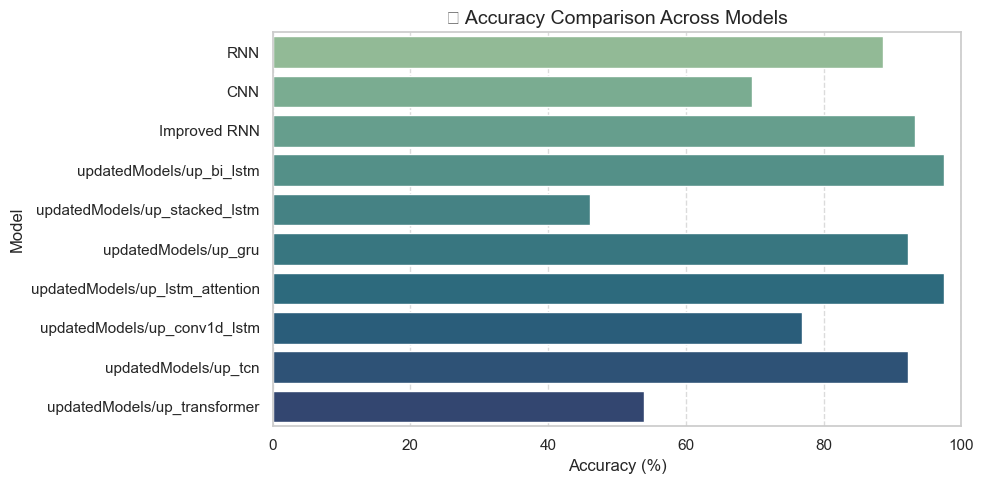

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


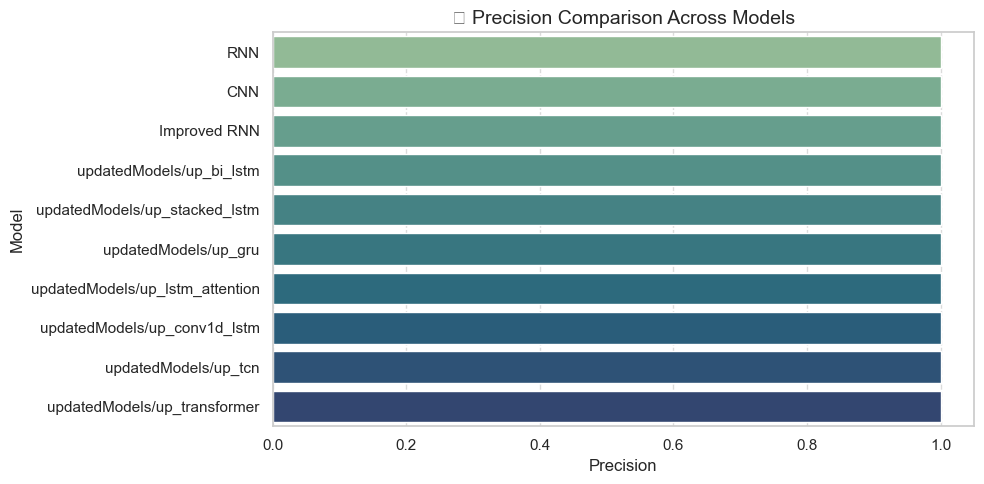

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


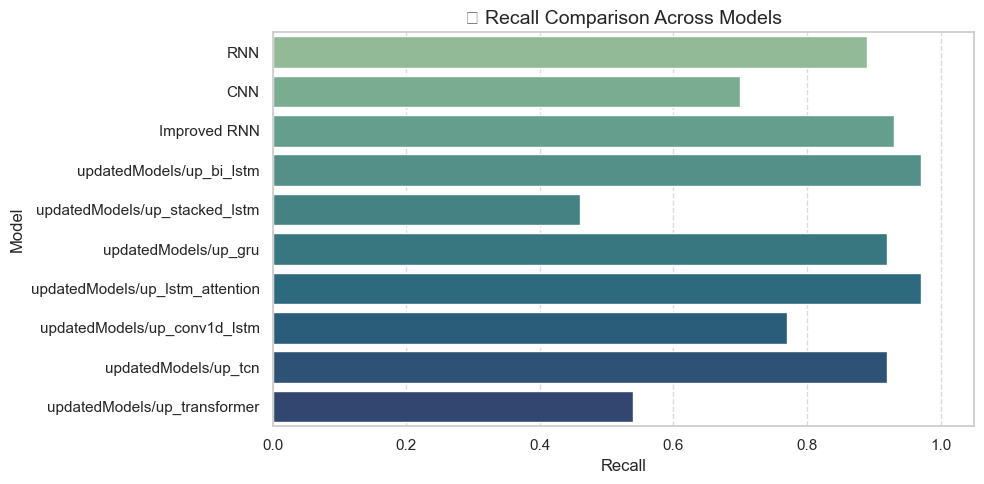

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\4166214248.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


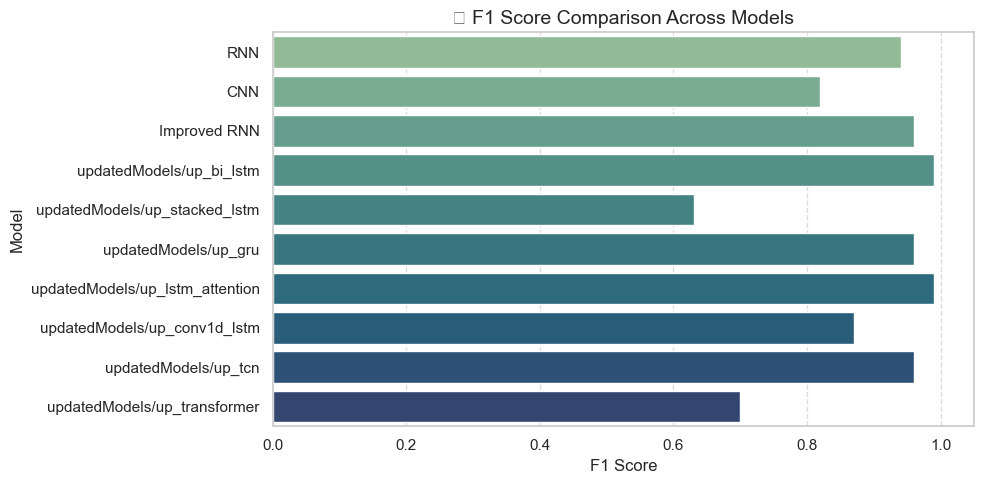

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn styling
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    all_metrics_df[col] = all_metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot configuration
metric_settings = {
    "Accuracy": {"xlim": (0, 100), "xlabel": "Accuracy (%)"},
    "Precision": {"xlim": (0, 1.05), "xlabel": "Precision"},
    "Recall": {"xlim": (0, 1.05), "xlabel": "Recall"},
    "F1 Score": {"xlim": (0, 1.05), "xlabel": "F1 Score"}
}

# Generate individual plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(data=all_metrics_df, y="Model", x=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison Across Models", fontsize=14)
    plt.xlabel(settings["xlabel"])
    plt.ylabel("Model")
    plt.xlim(settings["xlim"])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## BEST PERFORMANCE MODELS COMPARISON

In [67]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# ----------------------- Config -----------------------
model_names = [
    'updatedModels/up_bi_lstm','updatedModels/up_lstm_attention']
threshold = 6.5

# ----------------------- Helper Functions -----------------------
def euclidean_distance(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

def classification_metrics(y_true, y_pred, threshold=6.5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    acc = np.mean(distances <= threshold) * 100

    y_true_bin = np.ones_like(distances)
    y_pred_bin = (distances <= threshold).astype(int)

    prec = precision_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    return acc, prec, rec, f1

# ----------------------- Evaluation -----------------------
results = []
for model_name in model_names:
    try:
        print(f"🔄 Evaluating: {model_name}")
        model = tf.keras.models.load_model(f"{model_name}.h5", compile=False)
        y_pred = model.predict(X_test)

        # Regression Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        ed = euclidean_distance(y_test, y_pred)

        # Classification-like Metrics
        acc, prec, rec, f1 = classification_metrics(y_test, y_pred, threshold)

        # Store formatted results
        results.append({
            "Model": model_name,
            "Accuracy": f"{acc:.2f} ± 0.00",
            "Precision": f"{prec:.2f} ± 0.00",
            "Recall": f"{rec:.2f} ± 0.00",
            "F1 Score": f"{f1:.2f} ± 0.00",
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "R2 Score": r2,
            "Euclidean Distance": ed
        })
    except Exception as e:
        print(f"❌ Failed to evaluate {model_name}: {e}")

# ----------------------- Add Previous Results -----------------------

# Manually add prior baseline models
baseline_models = [
    {"Model": "RNN",           "Accuracy": "88.61 ± 5.47", "Precision": "1.00 ± 0.00", "Recall": "0.89 ± 0.05", "F1 Score": "0.94 ± 0.03"},
    {"Model": "CNN",           "Accuracy": "69.54 ± 7.38", "Precision": "1.00 ± 0.00", "Recall": "0.70 ± 0.07", "F1 Score": "0.82 ± 0.05"},
    {"Model": "Improved RNN",  "Accuracy": "93.25 ± 6.10", "Precision": "1.00 ± 0.00", "Recall": "0.93 ± 0.06", "F1 Score": "0.96 ± 0.03"},
]

results_class = baseline_models + [
    {
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"]
    }
    for r in results
]

# ----------------------- Display Tables -----------------------

# 📊 Classification-style Table
classification_table = [
    [r["Model"], r["Accuracy"], r["Precision"], r["Recall"], r["F1 Score"]]
    for r in results_class
]
headers_class = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print("\n📌 Classification-style Evaluation Metrics")
print(tabulate(classification_table, headers=headers_class, tablefmt="grid"))

# 📊 Regression Table
regression_df = pd.DataFrame(results)
regression_df = regression_df[["Model", "RMSE", "MAE", "MSE", "R2 Score", "Euclidean Distance"]]
regression_df = regression_df.sort_values(by="RMSE")

print("\n📌 Regression Metrics (sorted by RMSE):")
print(regression_df.to_string(index=False))

🔄 Evaluating: updatedModels/up_bi_lstm
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step
🔄 Evaluating: updatedModels/up_lstm_attention
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

📌 Classification-style Evaluation Metrics
+---------------------------------+--------------+-------------+-------------+-------------+
| Model                           | Accuracy     | Precision   | Recall      | F1 Score    |
+=================================+==============+=============+=============+=============+
| RNN                             | 88.61 ± 5.47 | 1.00 ± 0.00 | 0.89 ± 0.05 | 0.94 ± 0.03 |
+---------------------------------+--------------+-------------+-------------+-------------+
| CNN                             | 69.54 ± 7.38 | 1.00 ± 0.00 | 0.70 ± 0.07 | 0.82 ± 0.05 |
+---------------------------------+--------------+-------------+-------------+-------------+
| Improved RNN                    | 93.25 ± 6.10 | 1.00 ± 0.00 | 0.93 ± 0.06 | 0.96 ± 0.03 |
+---------------------------------+--------------+

In [68]:
# ----------------------- Combine All Metrics -----------------------

# Merge classification and regression results into one DataFrame
combined_results = []

# Include baselines first (no regression metrics)
for base in baseline_models:
    combined_results.append({
        "Model": base["Model"],
        "Accuracy": base["Accuracy"],
        "Precision": base["Precision"],
        "Recall": base["Recall"],
        "F1 Score": base["F1 Score"],
        "RMSE": np.nan,
        "MAE": np.nan,
        "MSE": np.nan,
        "R2 Score": np.nan,
        "Euclidean Distance": np.nan
    })

# Add deep learning models (with full metrics)
for r in results:
    combined_results.append({
        "Model": r["Model"],
        "Accuracy": r["Accuracy"],
        "Precision": r["Precision"],
        "Recall": r["Recall"],
        "F1 Score": r["F1 Score"],
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "MSE": r["MSE"],
        "R2 Score": r["R2 Score"],
        "Euclidean Distance": r["Euclidean Distance"]
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(combined_results)


In [69]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61 ± 5.47,1.00 ± 0.00,0.89 ± 0.05,0.94 ± 0.03,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54 ± 7.38,1.00 ± 0.00,0.70 ± 0.07,0.82 ± 0.05,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25 ± 6.10,1.00 ± 0.00,0.93 ± 0.06,0.96 ± 0.03,NaN,NaN,NaN,NaN,NaN
3,updatedModels/up_bi_lstm,97.44 ± 0.00,1.00 ± 0.00,0.97 ± 0.00,0.99 ± 0.00,2.125282,1.644208,4.516826,0.463628,2.639948
4,updatedModels/up_lstm_attention,97.44 ± 0.00,1.00 ± 0.00,0.97 ± 0.00,0.99 ± 0.00,2.111540,1.650743,4.458601,0.451968,2.655725


In [77]:
metrics_df["Model"] = metrics_df["Model"].replace({
    "updatedModels/up_bi_lstm": "Bi-LSTM",
    "updatedModels/up_lstm_attention": "LSTM + Attention"})

In [78]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,RMSE,MAE,MSE,R2 Score,Euclidean Distance
0,RNN,88.61,1.0,0.89,0.94,NaN,NaN,NaN,NaN,NaN
1,CNN,69.54,1.0,0.70,0.82,NaN,NaN,NaN,NaN,NaN
2,Improved RNN,93.25,1.0,0.93,0.96,NaN,NaN,NaN,NaN,NaN
3,Bi-LSTM,97.44,1.0,0.97,0.99,2.125282,1.644208,4.516826,0.463628,2.639948
4,LSTM + Attention,97.44,1.0,0.97,0.99,2.111540,1.650743,4.458601,0.451968,2.655725


C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


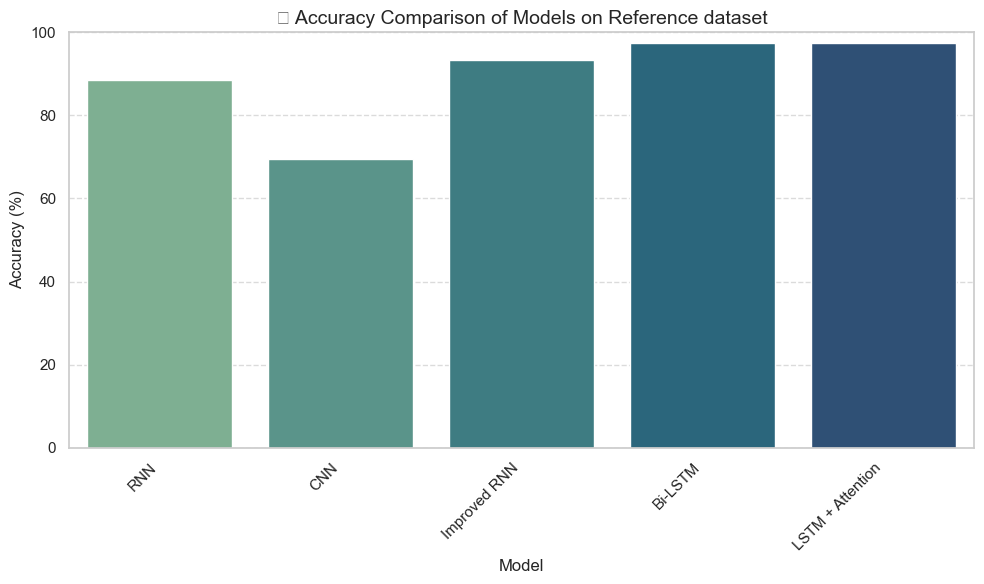

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


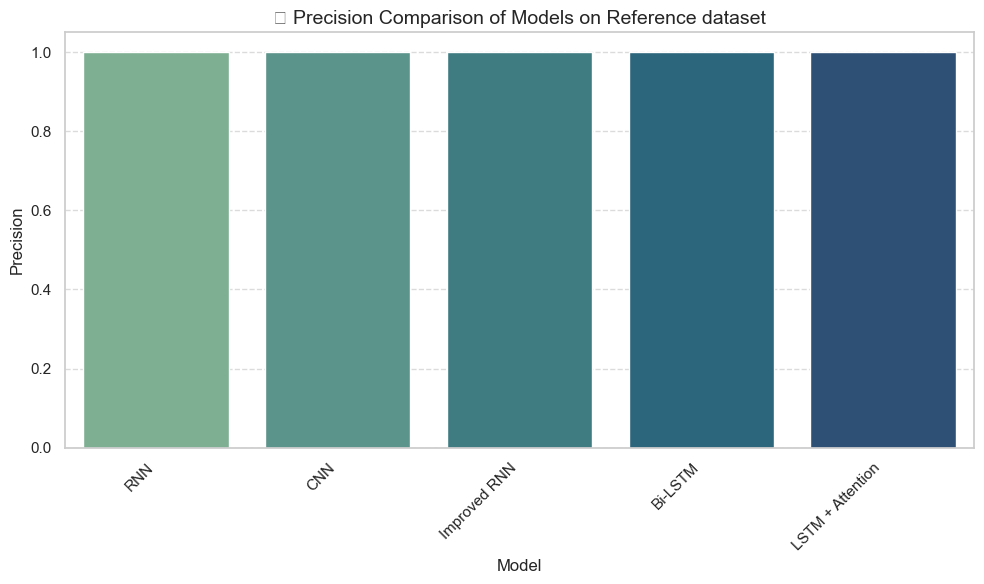

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


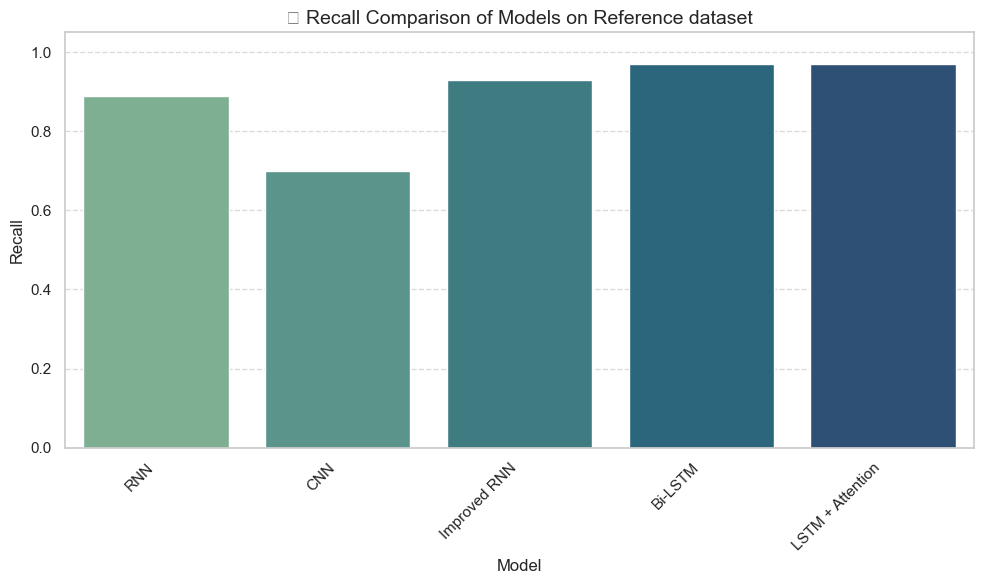

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1616568908.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


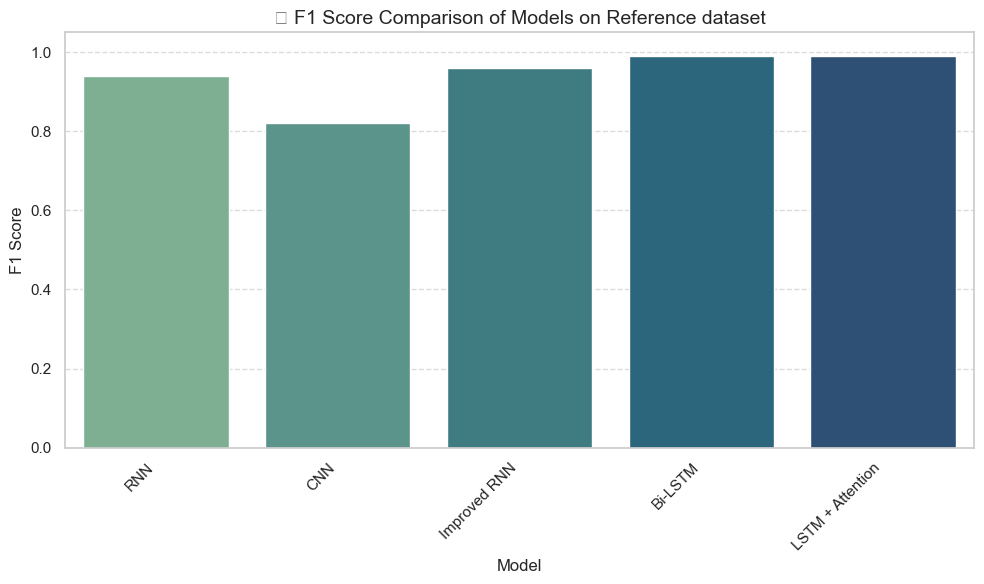

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn style
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    metrics_df[col] = metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot settings per metric
metric_settings = {
    "Accuracy": {"ylim": (0, 100), "ylabel": "Accuracy (%)"},
    "Precision": {"ylim": (0, 1.05), "ylabel": "Precision"},
    "Recall": {"ylim": (0, 1.05), "ylabel": "Recall"},
    "F1 Score": {"ylim": (0, 1.05), "ylabel": "F1 Score"}
}

# List your 5 selected model names (must match the names in the DataFrame)
selected_models = ["CNN", "RNN", "Improved RNN", "Bi-LSTM", "LSTM + Attention"]

# Filter DataFrame to include only these models
filtered_df = metrics_df[metrics_df["Model"].isin(selected_models)]
# Generate individual vertical bar plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, x="Model", y=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison of Models on Reference dataset", fontsize=14)
    plt.ylabel(settings["ylabel"])
    plt.xlabel("Model")
    plt.ylim(settings["ylim"])
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


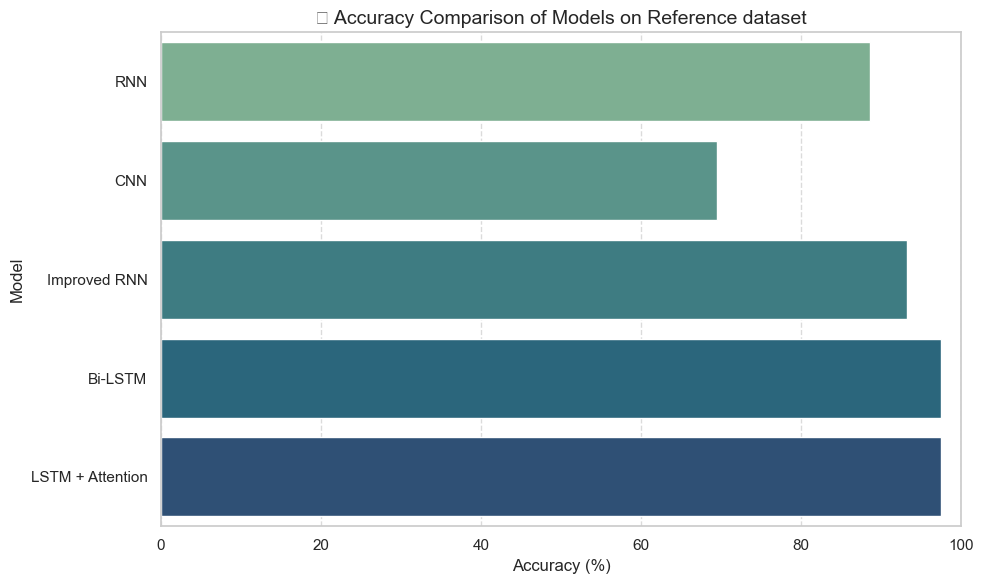

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


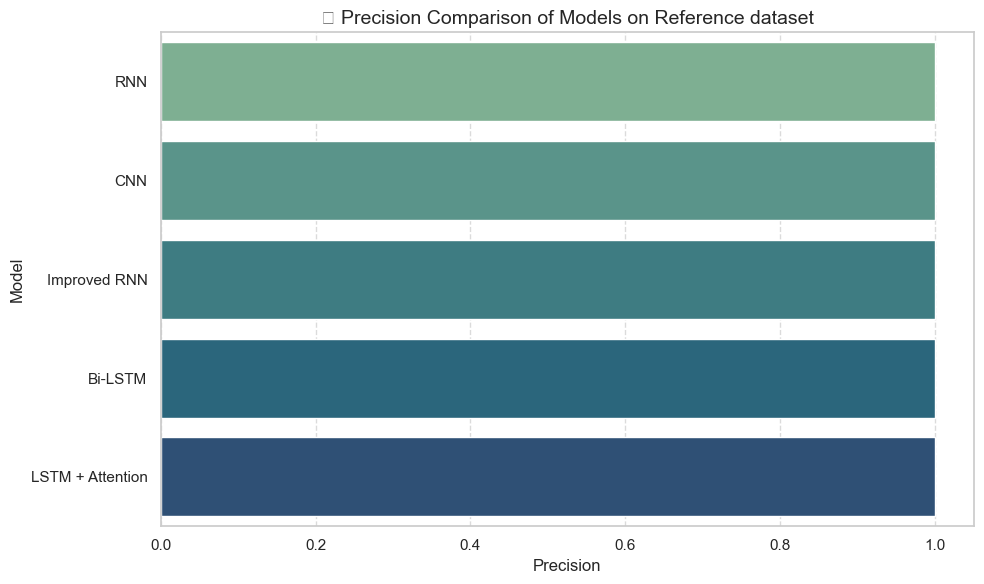

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


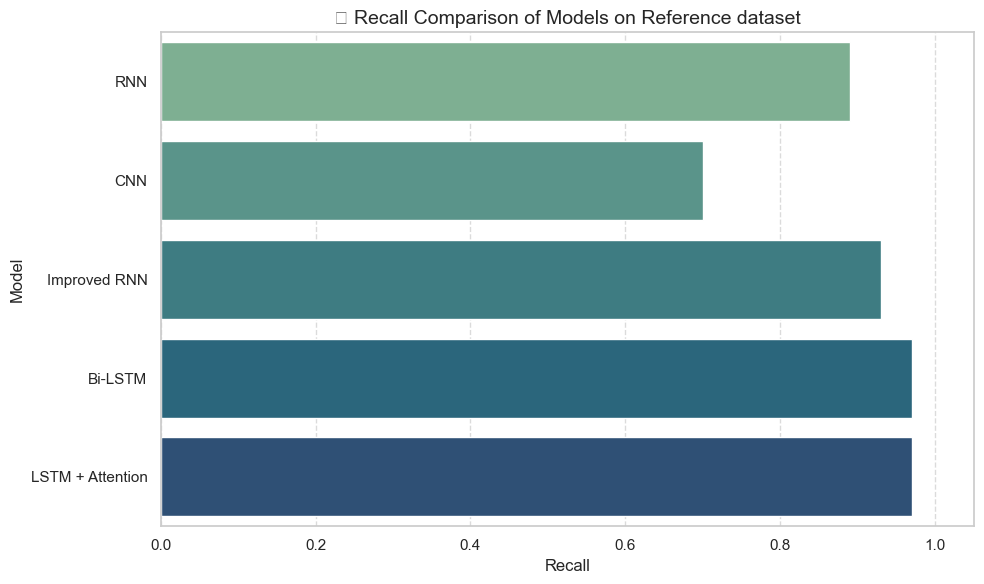

C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
C:\Users\0911a\AppData\Local\Temp\ipykernel_15508\1771525914.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


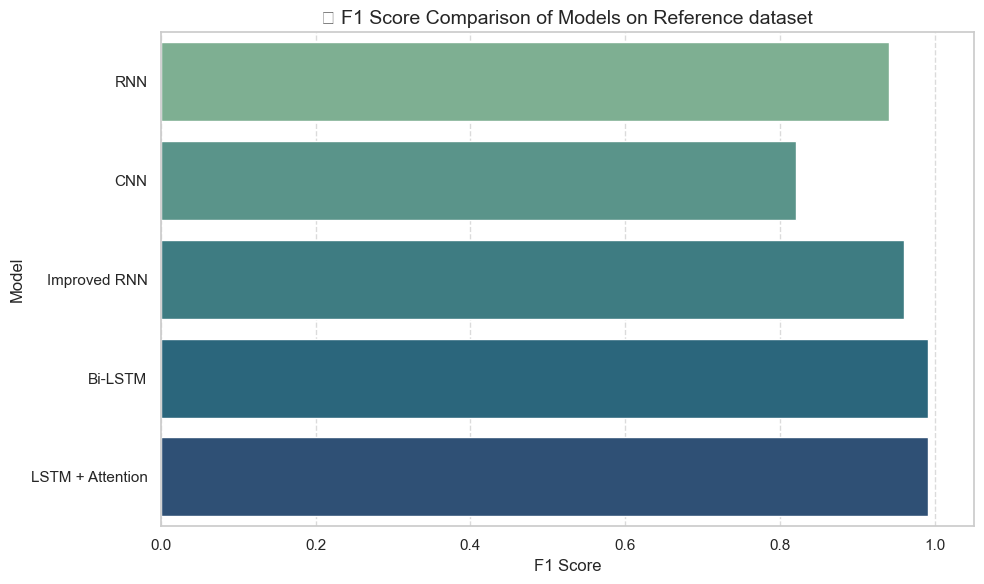

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn style
sns.set(style="whitegrid")

# Clean and convert classification metrics
for col in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    metrics_df[col] = metrics_df[col].astype(str).str.extract(r'([\d.]+)').astype(float)

# Plot settings per metric
metric_settings = {
    "Accuracy": {"xlim": (0, 100), "xlabel": "Accuracy (%)"},
    "Precision": {"xlim": (0, 1.05), "xlabel": "Precision"},
    "Recall": {"xlim": (0, 1.05), "xlabel": "Recall"},
    "F1 Score": {"xlim": (0, 1.05), "xlabel": "F1 Score"}
}

# List your 5 selected model names (must match the names in the DataFrame)
selected_models = ["CNN", "RNN", "Improved RNN", "Bi-LSTM", "LSTM + Attention"]

# Filter DataFrame to include only these models
filtered_df = metrics_df[metrics_df["Model"].isin(selected_models)]

# Generate individual horizontal bar plots
for metric, settings in metric_settings.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, y="Model", x=metric, palette="crest")
    plt.title(f"📊 {metric} Comparison of Models on Reference dataset", fontsize=14)
    plt.xlabel(settings["xlabel"])
    plt.ylabel("Model")
    plt.xlim(settings["xlim"])
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
